<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        Autistic Spectrum Disorder Screening
    </h1></td>
    <td width="20%">
    <div style="text-align: right">
    <b> Machine Learning</b> <br>  <b>AY 2021/2022</b> <br>
    Emanuele Cavalleri<br>(matriculation number: <b>995883</b>)<br>
    <a href="mailto:emanuele.cavalleri@mail.polimi.it">emanuele.cavalleri@mail.polimi.it</a><br>
    <a href="https://github.com/emanuelecavalleri/MLAutism">GitHub link for this project</a><br>
    </div>
</tr>
</table>

<b>Autistic Spectrum Disorder</b> (<b>ASD</b>) is a neurodevelopment condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. The aim of this machine learning project is to solve a classification task starting from a dataset related to autism screening of adults that contains ten behavioural features plus ten individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science.<br>
 <img src="https://valley-cbpingree.s3.us-west-1.amazonaws.com/wp-content/uploads/2020/07/13213032/Screen-Shot-2020-07-13-at-4.30.12-PM-480x451.png"> 

# Dependencies

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import pandas as pd
pd.set_option('display.max_columns', None) # Set the max columns displayed to none (show all of them)
pd.set_option('display.max_rows', None) # Set the max rows displayed to none (show all of them)

import numpy as np
np.random.seed(0)

from scipy.stats import norm, zscore

from collections import OrderedDict

import sklearn
from sklearn import preprocessing
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score, RocCurveDisplay, make_scorer, confusion_matrix
from sklearn.metrics import plot_confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, Perceptron 
from sklearn.dummy import DummyRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

# Load and describe data

In [2]:
# Read the data and create a Pandas DataFrame
url = "https://raw.githubusercontent.com/emanuelecavalleri/MLAutism/main/Autism-Adult-Data-Clean.csv"
pd_data = pd.read_csv(url)

# Dataframe's dimensions
pd_data.shape

(703, 21)

In [3]:
# Print the first few (5 by default) rows of the dataset
pd_data.head()

,1,1.1,1.2,1.3,0,0.1,1.4,1.5,0.2,0.3,26,f,White-European,no,no.1,United States,no.2,6,18 and more,Self,NO
0,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
1,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
2,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
3,1,0,0,0,0,0,0,1,0,0,40,f,Middle Eastern,no,no,Egypt,no,2,18 and more,?,NO
4,1,1,1,1,1,0,1,1,1,1,36,m,Others,yes,no,United States,no,9,18 and more,Self,YES


Unfortunately, the imported CSV has no columns' names. We can fix this issue since we retrieve attributes' names from the original paper: <i>Tabtah, F. (2017). Autism Spectrum Disorder Screening: Machine Learning Adaptation and DSM-5 Fulfillment. Proceedings of the 1st International Conference on Medical and Health Informatics 2017, pp.1-6. Taichung City, Taiwan, ACM.<i/>.

In [4]:
col_names=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score',
           'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jaundice', 'family_member_with_pdd',
           'country_of_res', 'used_app_before', 'result', 'age_desc', 'who_is_completing_the_test', 'Class/ASD']

pd_data = pd.read_csv(url, names=col_names, index_col=False)
pd_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,family_member_with_pdd,country_of_res,used_app_before,result,age_desc,who_is_completing_the_test,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,Middle Eastern,no,no,Egypt,no,2,18 and more,?,NO


In [5]:
# Check types of columns
pd_data.dtypes

A1_Score                       int64
A2_Score                       int64
A3_Score                       int64
A4_Score                       int64
A5_Score                       int64
A6_Score                       int64
A7_Score                       int64
A8_Score                       int64
A9_Score                       int64
A10_Score                      int64
age                            int64
gender                        object
ethnicity                     object
jaundice                      object
family_member_with_pdd        object
country_of_res                object
used_app_before               object
result                         int64
age_desc                      object
who_is_completing_the_test    object
Class/ASD                     object
dtype: object

Moreover, the dataset does not contain any null values.

In [6]:
pd_data.isnull().sum().sum()

0

Let's start analyzing the dataset column by column.
<ul>
    <li><b><i>Class/ASD</i></b> := Class. Boolean; whether the patient has ASD.</li>
</ul>

In [7]:
pd_data['Class/ASD'].value_counts()

NO     515
YES    189
Name: Class/ASD, dtype: int64

Since <i>Class/ASD</i> has only two possible values, we convert it into a single binary feature.

In [8]:
# Replace YES/NO with 1/0
pd_data['Class/ASD'] = pd_data['Class/ASD'].replace({'YES': 1, 'NO':0})

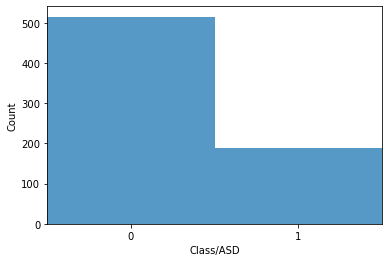

In [9]:
# Histogram of 'Class/ASD'
bins = np.arange(0, pd_data['Class/ASD'].max() + 1.5) - 0.5 # We're dealing with discrete values
_, ax = plt.subplots()
ax.set_xlim(-0.5,1.5)
ax.set_xticks(range(0,1+1))
sns.histplot(pd_data['Class/ASD'], bins=bins, linewidth=0, ax=ax)
plt.show()

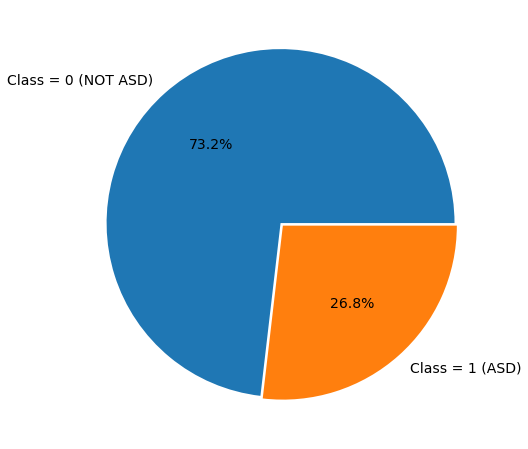

In [10]:
plt.figure(figsize=(15,8))
_ = plt.pie(pd_data['Class/ASD'].value_counts(), autopct='%1.1f%%', textprops={'fontsize': 14},
            labels=['Class = 0 (NOT ASD)','Class = 1 (ASD)'], explode=[0.01,0.01])

<ul>
    <li><b><i>A$n$_Score</i></b> := Question $n$ Answer ($n \in {1, ..., 10}$). Binary: $(0, 1)$; the answer code of the question based on the screening method used. They are ten behavioural features.</li>
</ul>

In [11]:
An_Score = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
            'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']
for Ai_Score in An_Score :
    print(pd_data[Ai_Score].value_counts())

1    508
0    196
Name: A1_Score, dtype: int64
0    385
1    319
Name: A2_Score, dtype: int64
0    382
1    322
Name: A3_Score, dtype: int64
0    355
1    349
Name: A4_Score, dtype: int64
0    353
1    351
Name: A5_Score, dtype: int64
0    504
1    200
Name: A6_Score, dtype: int64
0    410
1    294
Name: A7_Score, dtype: int64
1    457
0    247
Name: A8_Score, dtype: int64
0    476
1    228
Name: A9_Score, dtype: int64
1    404
0    300
Name: A10_Score, dtype: int64


<ul>
    <li><b><i>age</i></b> := Age. Number: age in years.</li>
</ul>

In [12]:
pd_data['age'].value_counts()

21    49
20    46
22    37
23    37
19    35
24    34
18    31
27    31
30    30
25    28
26    28
29    27
28    24
31    21
32    18
17    18
37    17
35    17
40    16
33    16
42    15
34    13
38    13
36    13
43    11
44    10
47     8
39     7
55     6
46     6
53     6
52     5
50     5
45     4
48     4
49     3
41     3
58     2
56     2
61     2
54     2
51     1
59     1
60     1
64     1
Name: age, dtype: int64

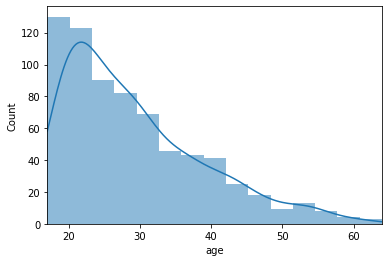

In [13]:
# Histogram + kernel density estimate of 'age'
_, ax = plt.subplots()
ax.set_xlim(pd_data['age'].min(),pd_data['age'].max())
sns.histplot(pd_data['age'], kde=True, linewidth=0, ax=ax)
plt.show()

Younger people (close to $20$-$30$ years of age) are the most represented ones in this study.

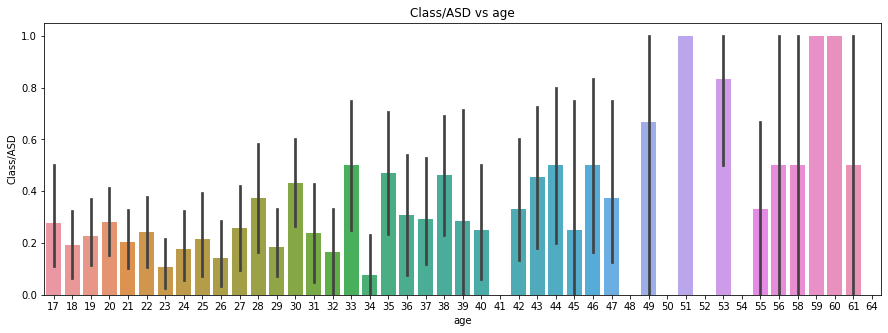

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x='age',y='Class/ASD',data=pd_data)
plt.title('Class/ASD vs age')
plt.xlabel('age')
plt.ylabel('Class/ASD')
plt.show()

Elders seem to be mostly classified as ASD (i.e., as the age grows, the more the probability of being classified as ASD).

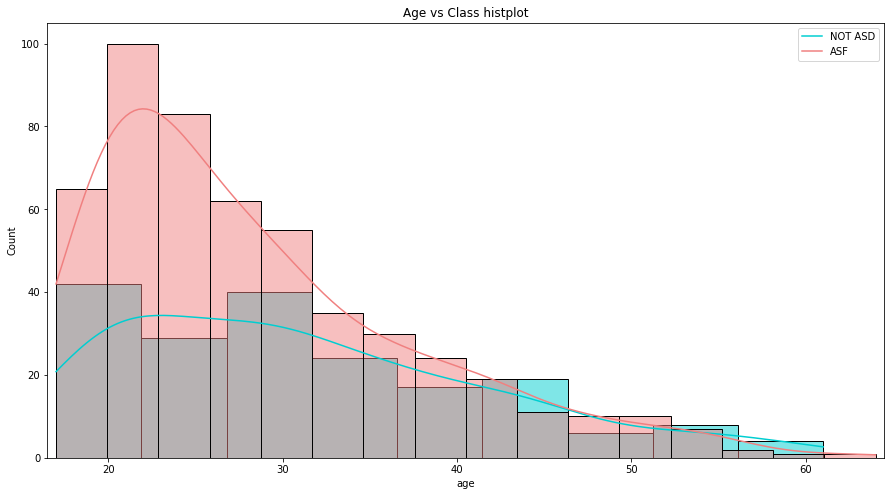

In [15]:
_, ax = plt.subplots(figsize=(15,8))
sns.histplot(
    pd_data.age[pd_data['Class/ASD'] == 1], 
    color="darkturquoise", 
    kde=True
)

sns.histplot(
    pd_data.age[pd_data['Class/ASD'] == 0], 
    color="lightcoral", 
    kde=True
)

plt.legend(['NOT ASD', 'ASF'])
plt.title('Age vs Class histplot')
plt.xlim(pd_data.age.min() - 0.5, pd_data.age.max() + 0.5)
plt.show()

<i>age</i> vs ASD and NOT ASD histplots with overlapped respective kernel density estimates show a little shift of ASD towards older ages.

<ul>
    <li><b><i>gender</i></b> := Gender. String: male or female.</li>
</ul>

In [16]:
pd_data['gender'].value_counts()

m    367
f    337
Name: gender, dtype: int64

Males and females are more or less equally represented in this study.

In [17]:
# Replace m/f with 1/0
pd_data['gender'] = pd_data['gender'].replace({'m': 1, 'f':0})

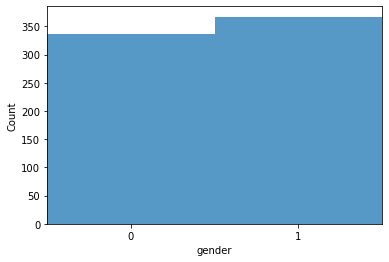

In [18]:
# Histogram estimate of 'gender'
bins = np.arange(0, pd_data['gender'].max() + 1.5) - 0.5 
_, ax = plt.subplots()
ax.set_xlim(-0.5,1.5)
ax.set_xticks(range(0,1+1))
sns.histplot(pd_data['gender'], bins=bins, linewidth=0, ax=ax)
plt.show()

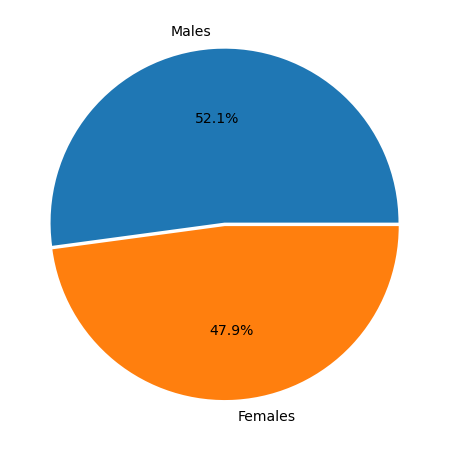

In [19]:
plt.figure(figsize=(15,8))
_ = plt.pie(pd_data['gender'].value_counts(), autopct='%1.1f%%', textprops={'fontsize': 14},
            labels=['Males','Females'], explode=[0.01,0.01])

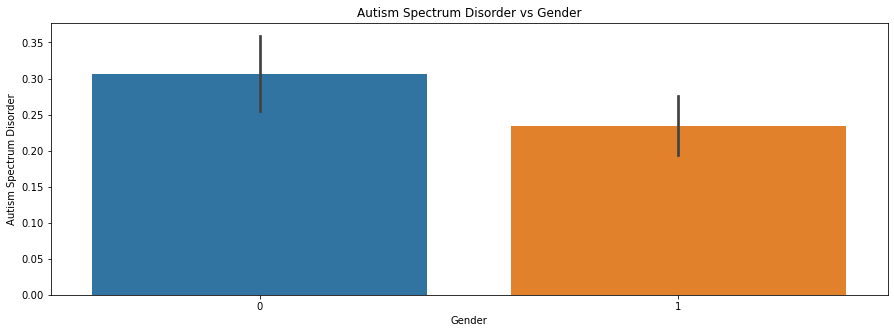

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x='gender',y='Class/ASD',data=pd_data)
plt.title('Autism Spectrum Disorder vs Gender')
plt.xlabel('Gender')
plt.ylabel('Autism Spectrum Disorder')
plt.show()

Within this study, females are more associated with ASD than males.

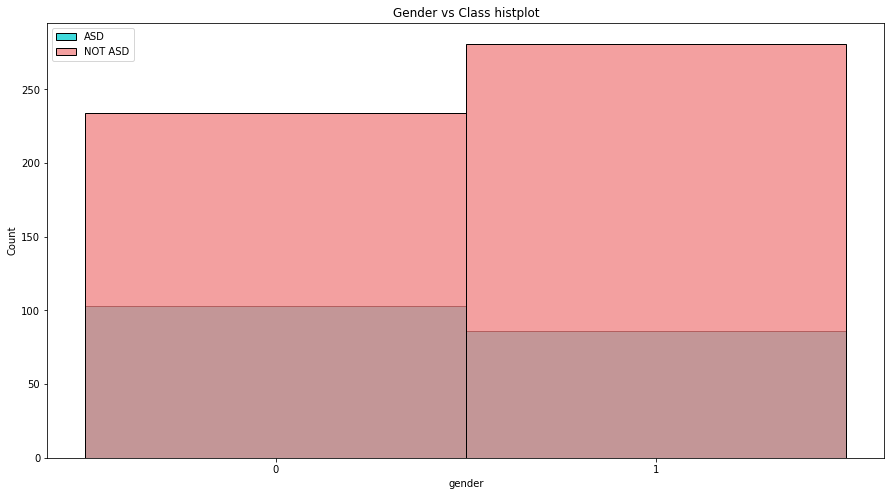

In [21]:
_, ax = plt.subplots(figsize=(15,8))
ax.set_xticks(range(0,1+1))
sns.histplot(
    pd_data.gender[pd_data['Class/ASD'] == 1], 
    color="darkturquoise", 
    bins=bins
)

sns.histplot(
    pd_data.gender[pd_data['Class/ASD'] == 0], 
    color="lightcoral", 
    bins=bins
)

plt.legend(['ASD', 'NOT ASD'])
plt.title('Gender vs Class histplot')
plt.show()

As seen before but from a different view point, females are more classified into ASD category than males even though in total males are a little bit more ($30$ people more). 

<ul>
    <li><b><i>ethnicity</i></b> := Ethnicity. String: list of common ethnicities in text format.</li>
</ul>

In [22]:
pd_data['ethnicity'].value_counts()

White-European    237
Middle Eastern    163
Asian             124
Others             47
Black              44
South Asian        36
Latino             22
Hispanic           13
Pasifika           12
Turkish             6
Name: ethnicity, dtype: int64

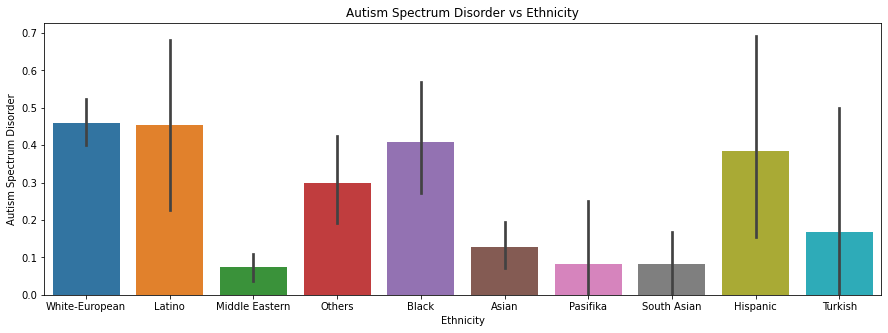

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(x='ethnicity',y='Class/ASD',data=pd_data)
plt.title('Autism Spectrum Disorder vs Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Autism Spectrum Disorder')
plt.show()

<i>White-European</i> and <i>Latino</i> have the stronger connection to ASD.

<ul>
    <li><b><i>jaundice</i></b> := Born with jaundice. Boolean: yes or no; whether the case was born with jaundice.</li>
</ul>

In [24]:
pd_data['jaundice'].value_counts()

no     635
yes     69
Name: jaundice, dtype: int64

In [25]:
# Replace yes/no with 1/0
pd_data['jaundice'] = pd_data['jaundice'].replace({'yes': 1, 'no':0})

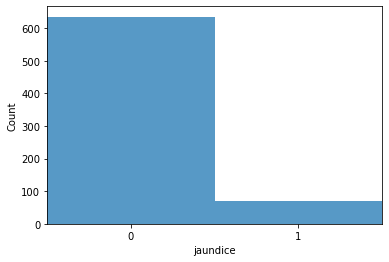

In [26]:
# Histogram of 'jaundice'
bins = np.arange(0, pd_data['jaundice'].max() + 1.5) - 0.5 
_, ax = plt.subplots()
ax.set_xlim(-0.5,1.5)
ax.set_xticks(range(0,1+1))
sns.histplot(pd_data['jaundice'], bins=bins, linewidth=0, ax=ax)
plt.show()

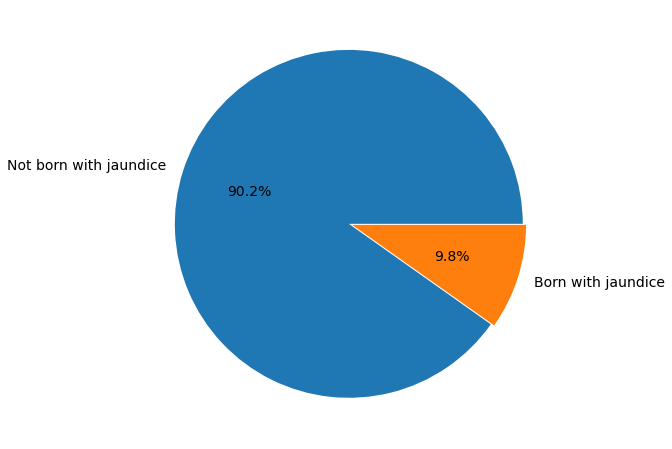

In [27]:
plt.figure(figsize=(15,8))
_ = plt.pie(pd_data['jaundice'].value_counts(), autopct='%1.1f%%', textprops={'fontsize': 14},
            labels=['Not born with jaundice','Born with jaundice'], explode=[0.01,0.01])

People born without jaundice are the most represented ones.

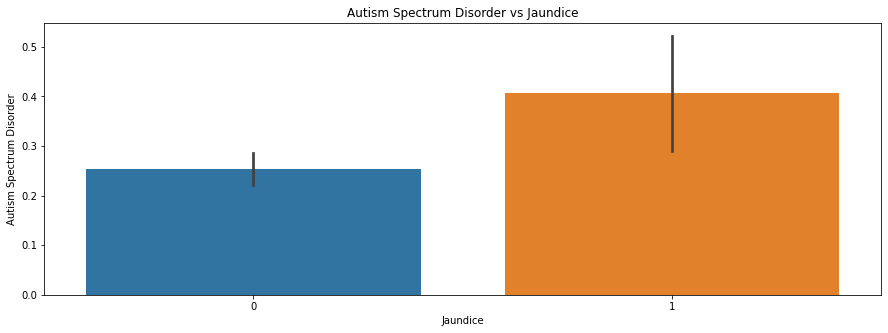

In [28]:
plt.figure(figsize=(15,5))
sns.barplot(x='jaundice',y='Class/ASD',data=pd_data)
plt.title('Autism Spectrum Disorder vs Jaundice')
plt.xlabel('Jaundice')
plt.ylabel('Autism Spectrum Disorder')
plt.show()

People born with jaundice seem to be more connected to ASD.

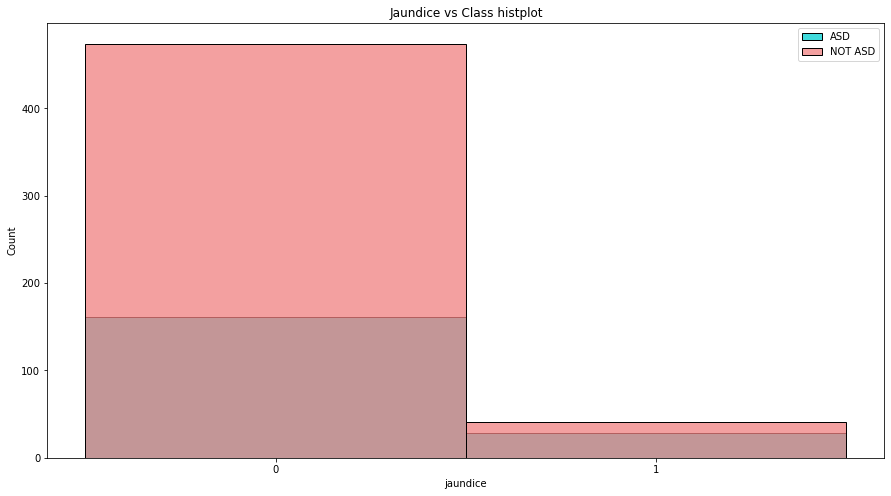

In [29]:
_, ax = plt.subplots(figsize=(15,8))
ax.set_xticks(range(0,1+1))
sns.histplot(
    pd_data.jaundice[pd_data['Class/ASD'] == 1], 
    color="darkturquoise", 
    bins=bins
)

sns.histplot(
    pd_data.jaundice[pd_data['Class/ASD'] == 0], 
    color="lightcoral", 
    bins=bins
)

plt.legend(['ASD', 'NOT ASD'])
plt.title('Jaundice vs Class histplot')
plt.show()

People born without jaundice are the most ones and they are mostly not connected to ASD. The one born with jaundice tend to overlap better with ASD.

<ul>
    <li><b><i>family_member_with_pdd</i></b> := Family member with PDD. Boolean: yes or no: whether any immediate family member has a PDD.</li>
</ul>

In [30]:
pd_data['family_member_with_pdd'].value_counts()

no     613
yes     91
Name: family_member_with_pdd, dtype: int64

In [31]:
# Replace yes/no with 1/0
pd_data['family_member_with_pdd'] = pd_data['family_member_with_pdd'].replace({'yes': 1, 'no':0})

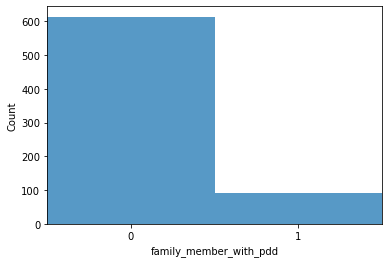

In [32]:
# Histogram of 'family_member_with_pdd'
bins = np.arange(0, pd_data['family_member_with_pdd'].max() + 1.5) - 0.5
fig, ax = plt.subplots()
sns.histplot(pd_data['family_member_with_pdd'], bins=bins, linewidth=0, ax=ax)
ax.set_xlim(-0.5,1.5)
ax.set_xticks(range(0,1+1))
plt.show()

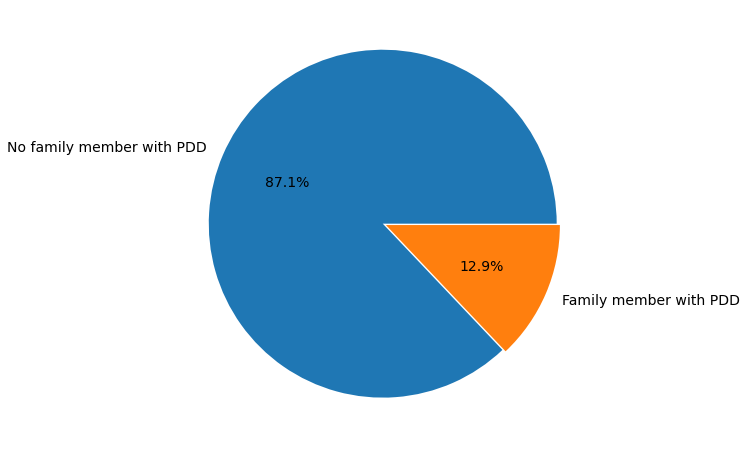

In [33]:
plt.figure(figsize=(15,8))
_ = plt.pie(pd_data['family_member_with_pdd'].value_counts(), autopct='%1.1f%%', textprops={'fontsize': 14},
            labels=['No family member with PDD','Family member with PDD'], explode=[0.01,0.01])

People without a family member with PDD are the most represented ones.

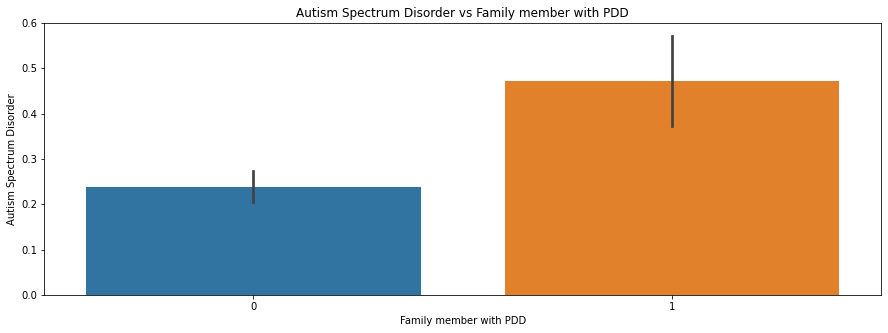

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(x='family_member_with_pdd',y='Class/ASD',data=pd_data)
plt.title('Autism Spectrum Disorder vs Family member with PDD')
plt.xlabel('Family member with PDD')
plt.ylabel('Autism Spectrum Disorder')
plt.show()

People with a family member with PDD seem to be more connected to ASD.

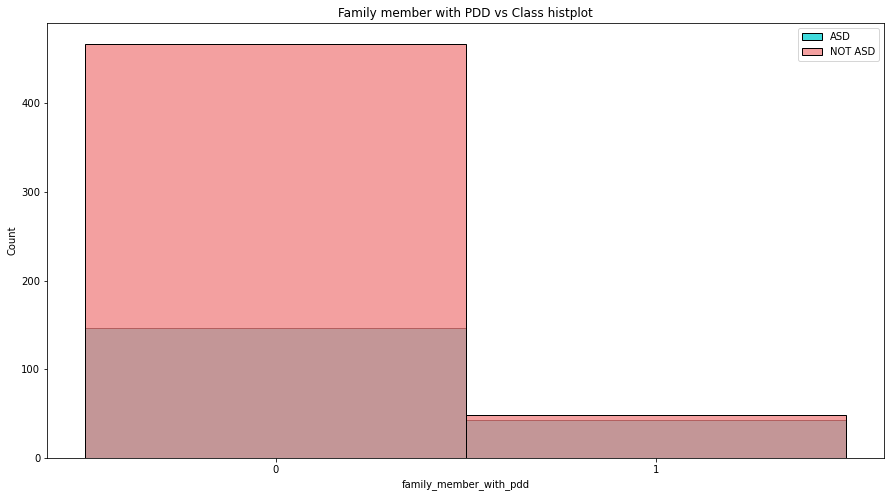

In [35]:
_, ax = plt.subplots(figsize=(15,8))
ax.set_xticks(range(0,1+1))
sns.histplot(
    pd_data.family_member_with_pdd[pd_data['Class/ASD'] == 1], 
    color="darkturquoise", 
    bins=bins
)

sns.histplot(
    pd_data.family_member_with_pdd[pd_data['Class/ASD'] == 0], 
    color="lightcoral", 
    bins=bins
)

plt.legend(['ASD', 'NOT ASD'])
plt.title('Family member with PDD vs Class histplot')
plt.show()

People without a family member with PDD are the most ones and they are mostly not connected to ASD. The ones having a family member with PDD tend to overlap better with ASD, in fact people with a family member with PDD classified as ASD are:

In [36]:
pd_data.family_member_with_pdd[pd_data['Class/ASD'] == 1].sum()

43

People with a family member with PDD classified as NOT ASD are:

In [37]:
pd_data.family_member_with_pdd[pd_data['Class/ASD'] == 0].sum()

48

So almost the same number (i.e., people with a family member with PDD classified as ASD or NOT ASD are equally distributed).

<ul>
    <li><b><i>country_of_res</i></b> := Country of residence. String: list of countries in text format.</i>
</ul>

In [38]:
pd_data['country_of_res'].value_counts()

United States           113
United Arab Emirates     82
India                    81
New Zealand              81
United Kingdom           77
Jordan                   47
Australia                27
Canada                   15
Sri Lanka                14
Afghanistan              13
France                   11
Netherlands              10
Brazil                    9
Mexico                    8
Iran                      7
Russia                    7
Italy                     5
Viet Nam                  5
Ireland                   5
Malaysia                  5
Austria                   4
Saudi Arabia              4
Germany                   4
Philippines               4
Pakistan                  3
Kazakhstan                3
Belgium                   3
Egypt                     3
Romania                   3
Spain                     3
Bangladesh                3
Sweden                    2
South Africa              2
Bahamas                   2
Ethiopia                  2
Iceland             

We have a lot of countries with low number of cases ($< 10$). We'll include those ones into <i>Others</i> (also because otherwise the subsequent <i>one-hot encoding</i> of this feature may lead to a curse of dimensionality).

In [39]:
pd_data_country_of_res = pd.DataFrame(pd_data['country_of_res'].value_counts())
ln = list(pd_data_country_of_res[pd_data_country_of_res.country_of_res < 10].index)
pd_data['country_of_res'] = pd_data['country_of_res'].apply(lambda country: 'Others' if country in ln else country)
pd_data['country_of_res'].value_counts()

Others                  133
United States           113
United Arab Emirates     82
New Zealand              81
India                    81
United Kingdom           77
Jordan                   47
Australia                27
Canada                   15
Sri Lanka                14
Afghanistan              13
France                   11
Netherlands              10
Name: country_of_res, dtype: int64

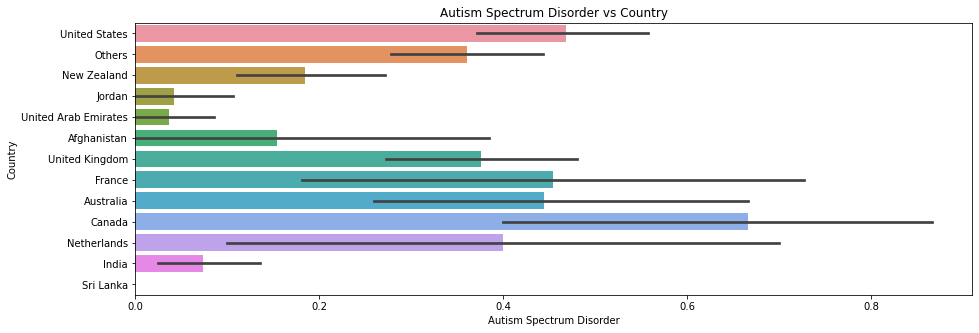

In [40]:
plt.figure(figsize=(15,5))
sns.barplot(x='Class/ASD',y='country_of_res',data=pd_data)
plt.title('Autism Spectrum Disorder vs Country')
plt.ylabel('Country')
plt.xlabel('Autism Spectrum Disorder')
plt.show()

Canadians are the ones with more people classified as ASD.

<ul>
    <li><b><i>used_app_before</i></b> := Used the screening app before. Boolean: yes or no; whether the user has used a screening app.</li>
</ul>

In [41]:
pd_data['used_app_before'].value_counts()

no     692
yes     12
Name: used_app_before, dtype: int64

In [42]:
# Replace yes/no with 1/0
pd_data['used_app_before'] = pd_data['used_app_before'].replace({'yes': 1, 'no':0})

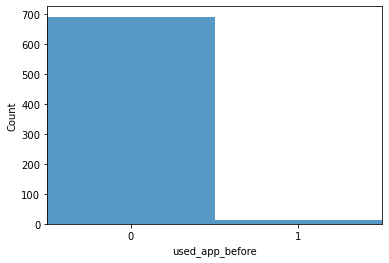

In [43]:
# Histogram of 'Uniformity_of_cell_size'
bins = np.arange(0, pd_data['used_app_before'].max() + 1.5) - 0.5
fig, ax = plt.subplots()
sns.histplot(pd_data['used_app_before'], bins=bins, linewidth=0, ax=ax)
ax.set_xlim(-0.5,1.5)
ax.set_xticks(range(0,1+1))
plt.show()

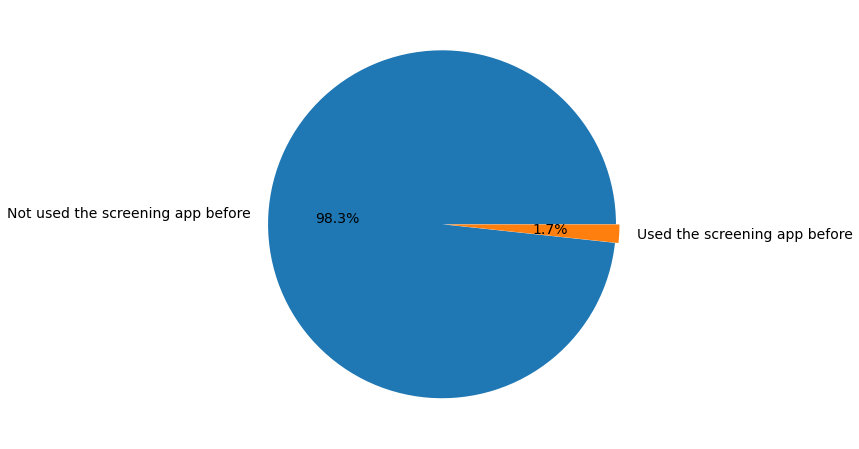

In [44]:
plt.figure(figsize=(15,8))
_ = plt.pie(pd_data['used_app_before'].value_counts(), autopct='%1.1f%%', textprops={'fontsize': 14},
            labels=['Not used the screening app before','Used the screening app before'], explode=[0.01,0.01])

Almost no one used the screening app before.

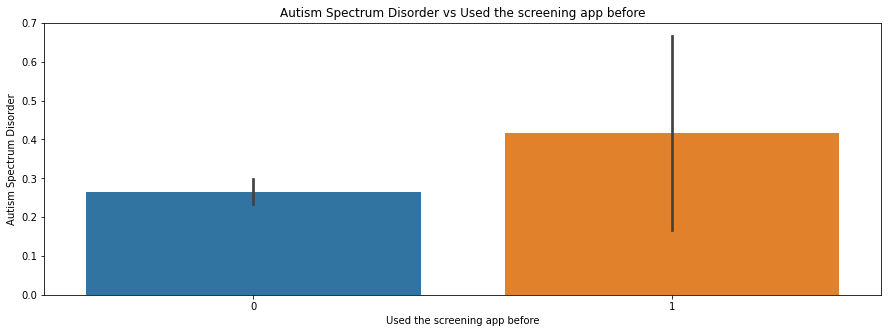

In [45]:
plt.figure(figsize=(15,5))
sns.barplot(x='used_app_before',y='Class/ASD',data=pd_data)
plt.title('Autism Spectrum Disorder vs Used the screening app before')
plt.xlabel('Used the screening app before')
plt.ylabel('Autism Spectrum Disorder')
plt.show()

People who used the screening app seem to associate with ASD, but this is not so statistically relevant since we're dealing with a low number of people ($1.7$% of the total).

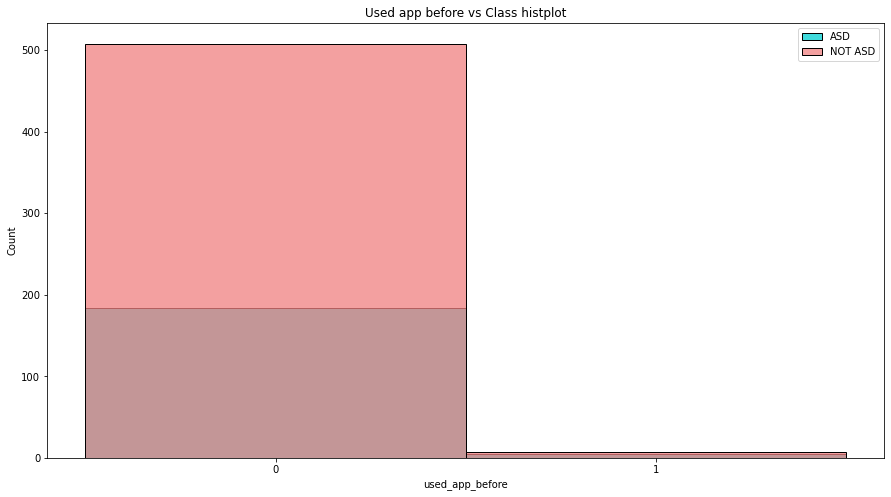

In [46]:
_, ax = plt.subplots(figsize=(15,8))
ax.set_xticks(range(0,1+1))
sns.histplot(
    pd_data.used_app_before[pd_data['Class/ASD'] == 1], 
    color="darkturquoise", 
    bins=bins
)

sns.histplot(
    pd_data.used_app_before[pd_data['Class/ASD'] == 0], 
    color="lightcoral", 
    bins=bins
)

plt.legend(['ASD', 'NOT ASD'])
plt.title('Used app before vs Class histplot')
plt.show()

People who have used the screening app (although a low number of the total as said, so not a statistical relevant sample) are more or less equally distributed among ASD and NOT ASD classes. People who have used the screening app classified as ASD are:

In [47]:
pd_data.used_app_before[pd_data['Class/ASD'] == 1].sum()

5

People who have used the screening app classified as NOT ASD are:

In [48]:
pd_data.used_app_before[pd_data['Class/ASD'] == 0].sum()

7

So more or less the same number (i.e., people who used the screening app before classified as ASD or NOT ASD are equally distributed).

<ul>
    <li><b><i>result</i></b> := Screening Score Result. Integer: screening score, it is equivalent to target class.</li>
</ul>

In [49]:
pd_data['result'].value_counts()

4     131
3     110
5      83
2      74
6      70
7      57
8      55
9      47
1      33
10     30
0      14
Name: result, dtype: int64

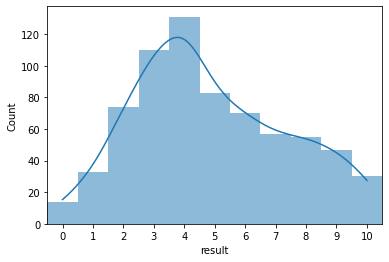

In [50]:
# Histogram + kernel density estimate of 'result'
bins = np.arange(0, pd_data['result'].max() + 1.5) - 0.5 
_, ax = plt.subplots()
ax.set_xlim(-0.5,10.5)
ax.set_xticks(range(0,10+1))
sns.histplot(pd_data['result'], bins=bins, kde=True, linewidth=0, ax=ax)
plt.show()

We can safely drop the result column as it is an amalgamation of the A$1$ to $10$_Score columns. 

In [51]:
pd_data.drop(columns='result', inplace=True)

<ul>
    <li><b><i>age_desc</i></b> := Age description. Always <i>18 and more</i> since we are dealing with adults.</li>
</ul>

In [52]:
pd_data['age_desc'].value_counts()

18 and more    704
Name: age_desc, dtype: int64

In [53]:
# Dropping age_desc column since it only contains one repetitive value.
pd_data.drop(columns='age_desc', inplace=True)

<ul>
    <li><b><i>who_is_completing_the_test</i></b> := Who is completing the test. String: parent, self, caregiver, medical staff, clinician, etc.</li>
</ul>

In [54]:
pd_data['who_is_completing_the_test'].value_counts()

Self                        522
?                            95
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: who_is_completing_the_test, dtype: int64

<i>?</i> values must be caregivers or <i>Others</i> by exclusion.

In [55]:
pd_data['who_is_completing_the_test'] = pd_data['who_is_completing_the_test'].replace(['?'], 'Caregiver and others')
pd_data['who_is_completing_the_test'] = pd_data['who_is_completing_the_test'].replace(['Others'], 'Caregiver and others')
pd_data['who_is_completing_the_test'].value_counts()

Self                        522
Caregiver and others        100
Parent                       50
Relative                     28
Health care professional      4
Name: who_is_completing_the_test, dtype: int64

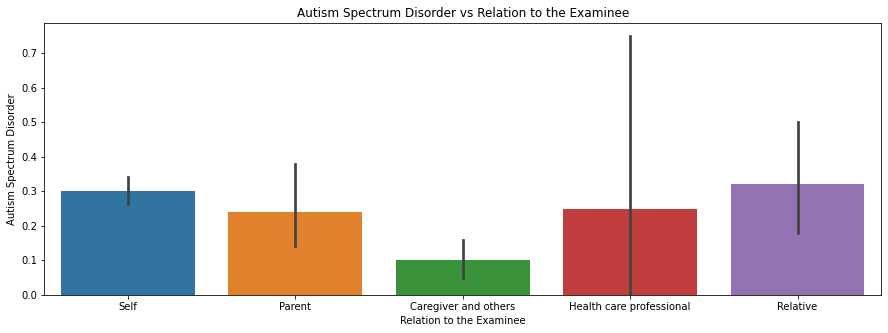

In [56]:
plt.figure(figsize=(15,5))
sns.barplot(x='who_is_completing_the_test',y='Class/ASD',data=pd_data)
plt.title('Autism Spectrum Disorder vs Relation to the Examinee')
plt.xlabel('Relation to the Examinee')
plt.ylabel('Autism Spectrum Disorder')
plt.show()

If a caregiver or other completes the test we have less probability to obtain an ASD classification of the patient.

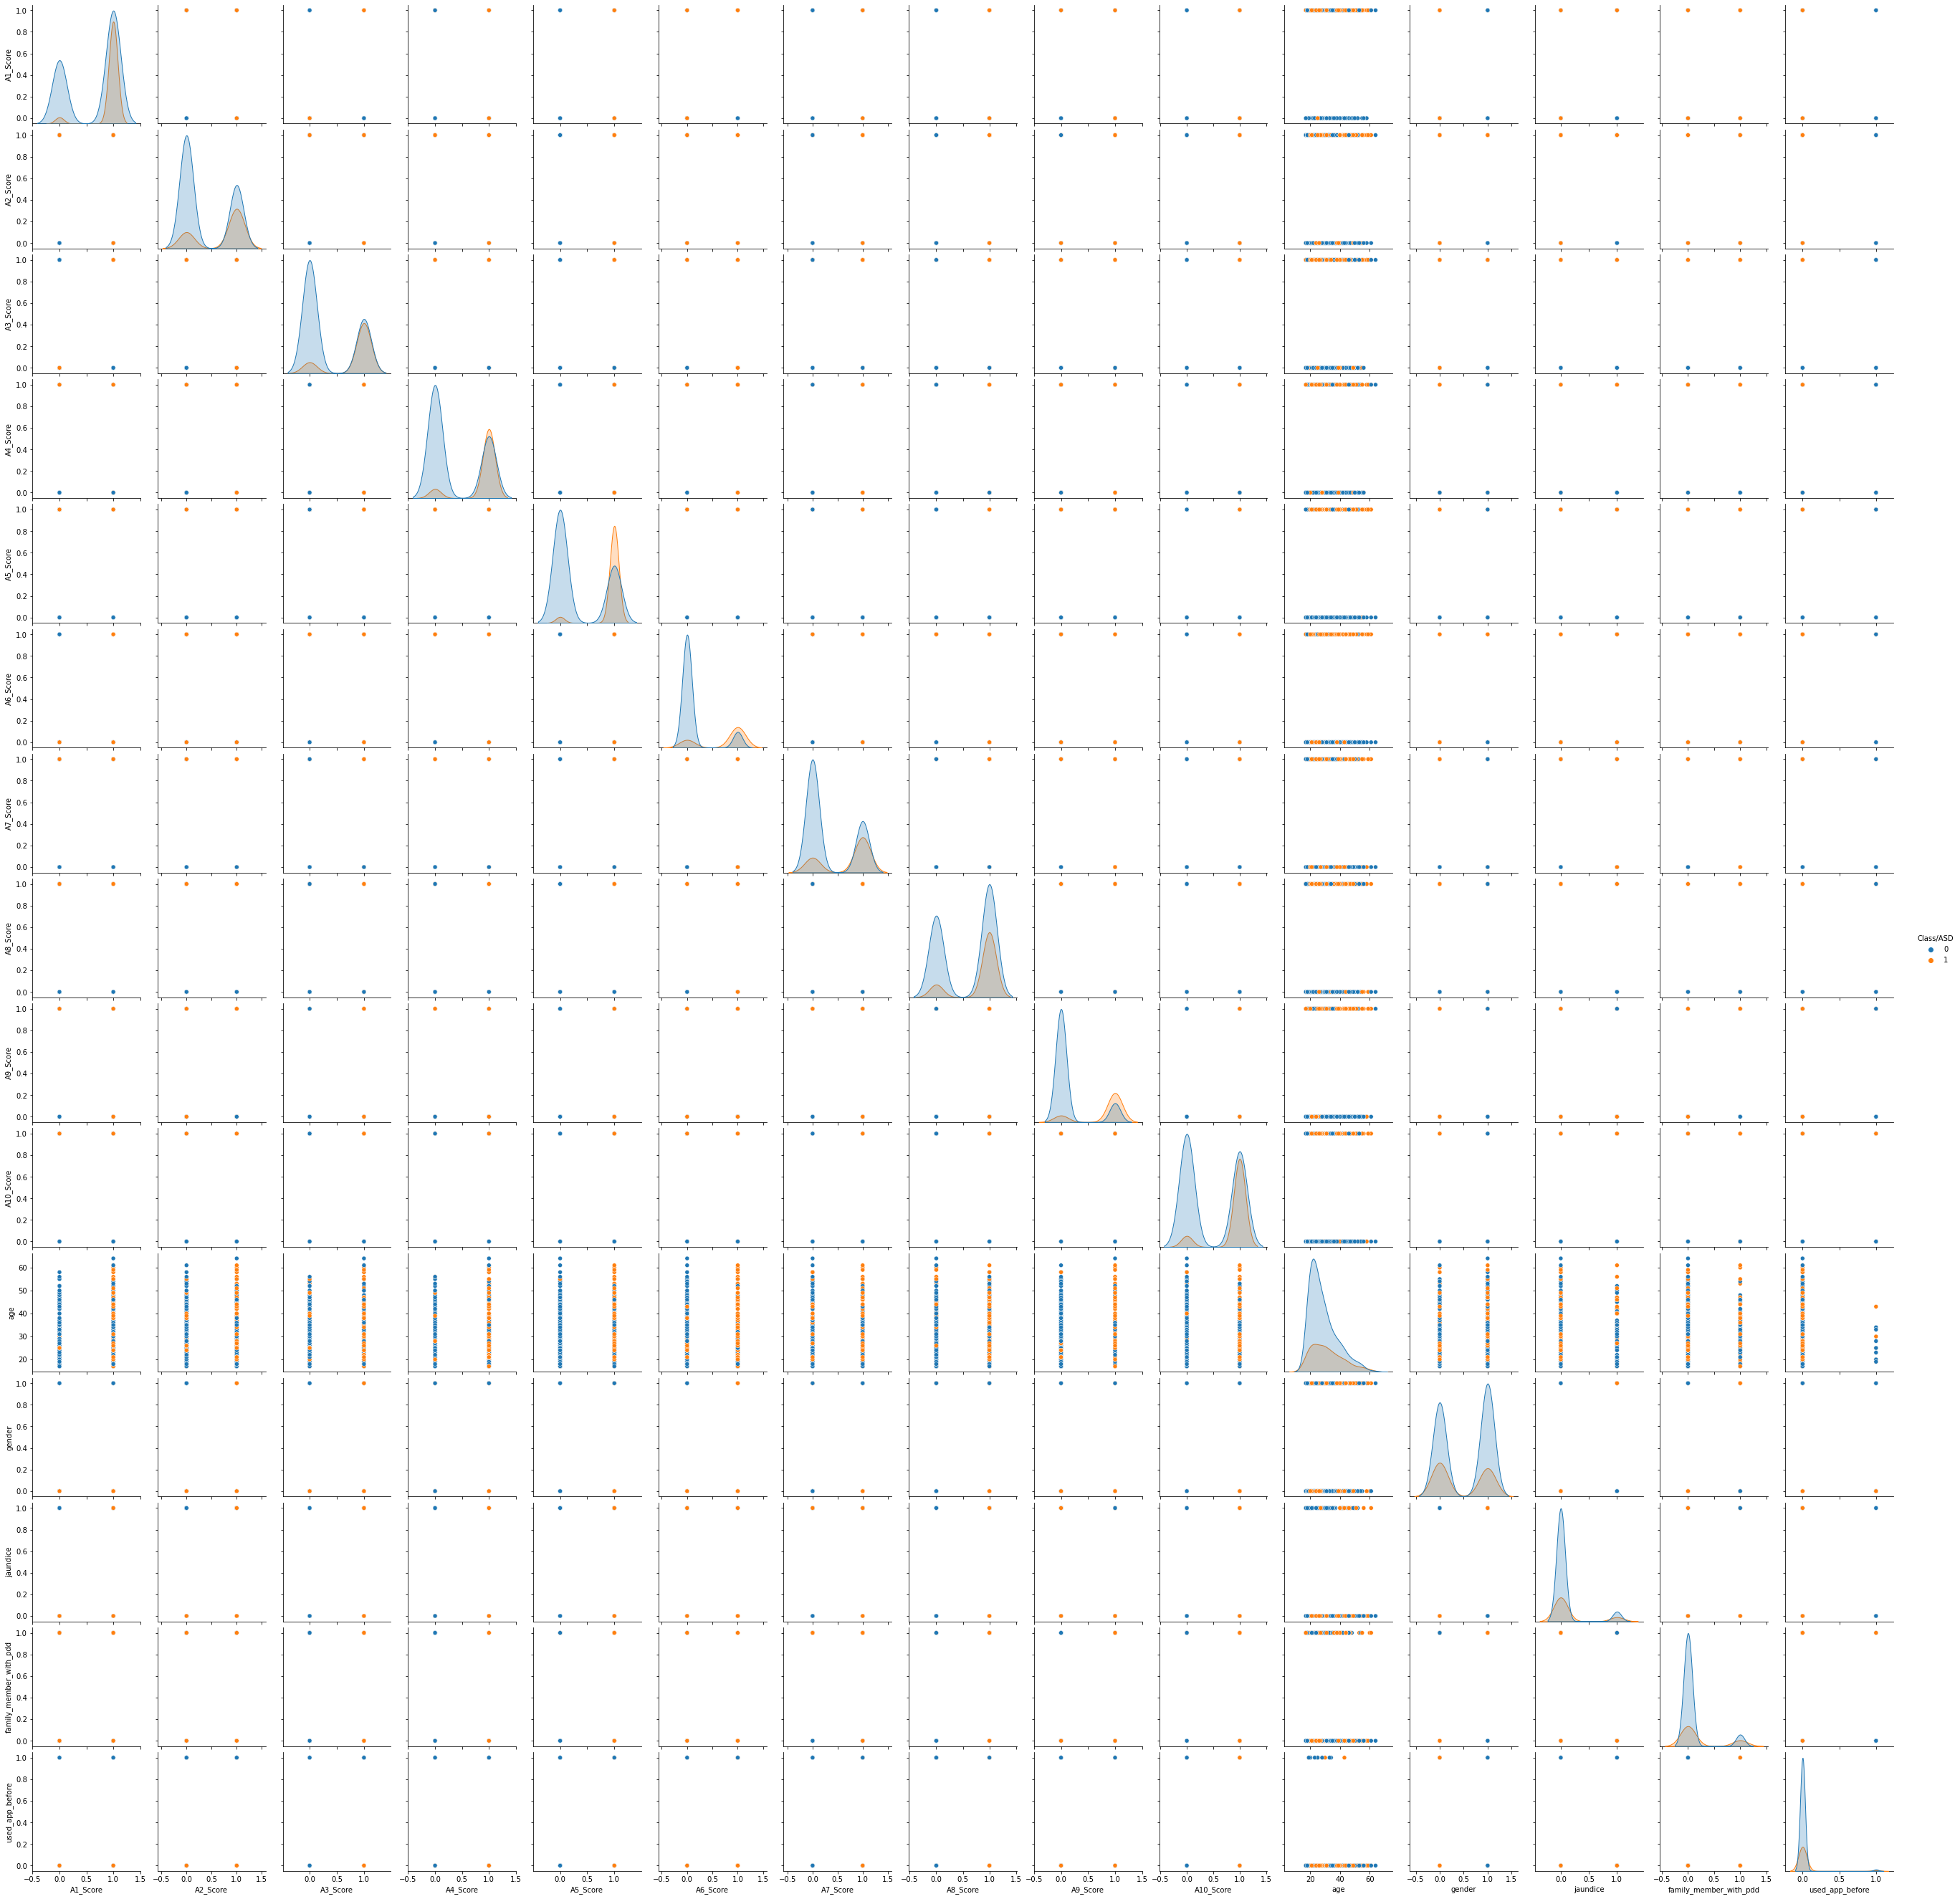

In [57]:
# Pairplot of all variables
_ = sns.pairplot(pd_data, hue='Class/ASD', height=2.5)

The diagonal summarizes what we have seen in details before considering features vs <i>Class/ASD</i> histplots.

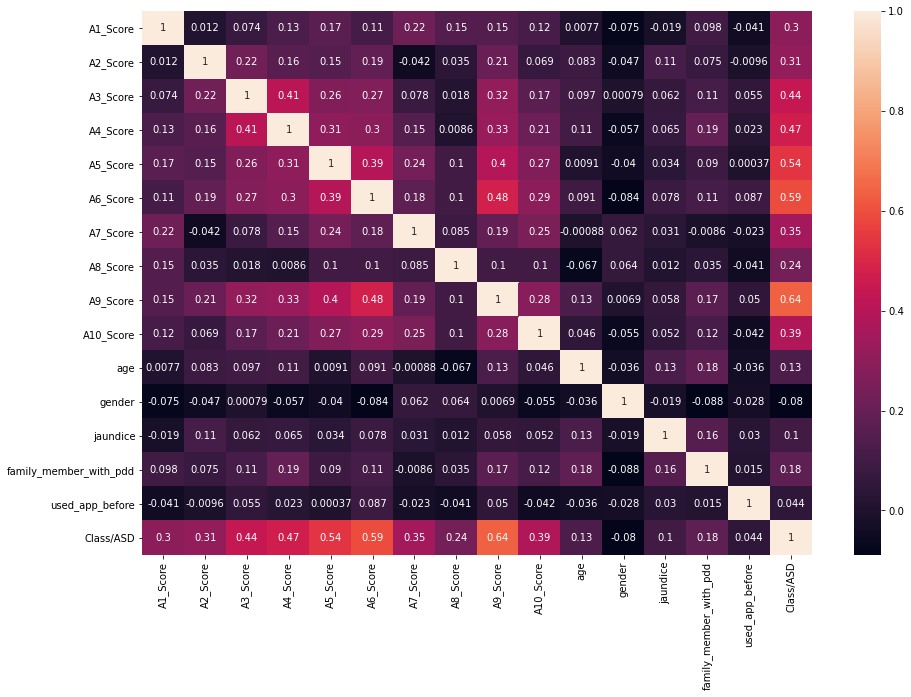

In [58]:
# Correlation matrix
_ = plt.figure(figsize=(15,10))
corrMatrix = pd_data.corr()
_ = sns.heatmap(corrMatrix, annot=True)
plt.show()

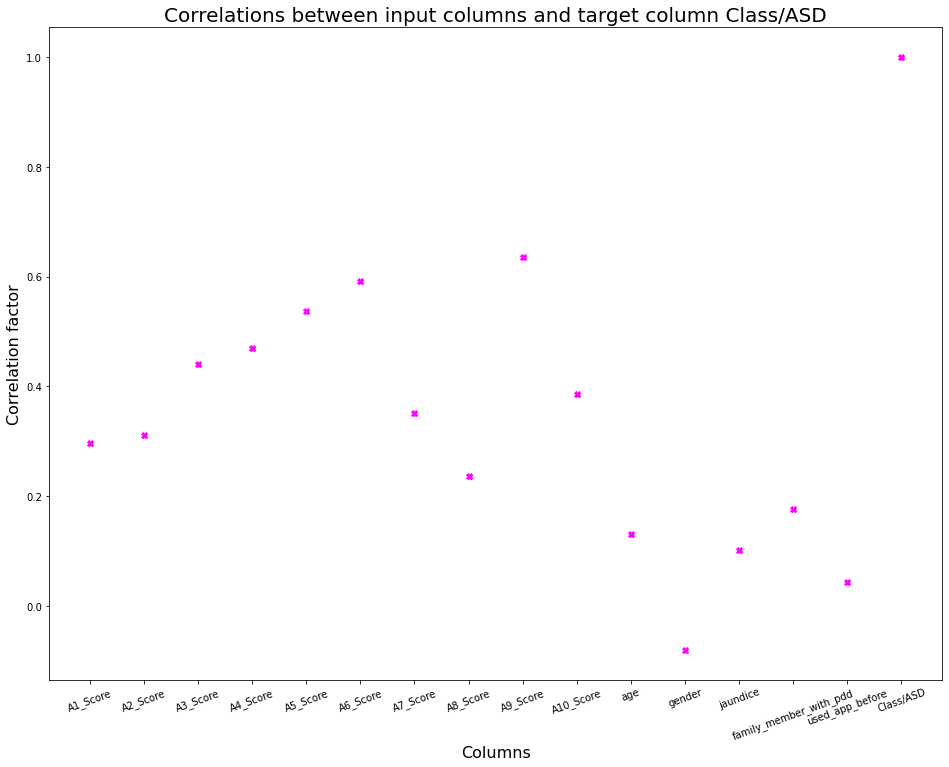

In [59]:
autcorr = pd_data.corr()["Class/ASD"]
plt.figure(figsize = (16, 12))
plt.title("Correlations between input columns and target column Class/ASD", fontsize = 20)
plt.xlabel("Columns", fontsize = 16)
plt.xticks(rotation = 20) # X axis' rotation = 20°
plt.ylabel("Correlation factor", fontsize = 16)
plt.plot(autcorr, color = "magenta", linestyle = "", marker = "X")
plt.show()

ASD is highly correlated with A$9$, A$6$, A$5$ and A$4$ scores.

Now we need to encode the remaining categorical columns with an <i>one-hot encoding</i> system.

In [60]:
# Getting dummy variables (one-hot encoding) for 'ethnicity', 'country_of_res' and 'who_is_completing_the_test'
pd_data = pd.get_dummies(pd_data,columns=['ethnicity', 'country_of_res', 'who_is_completing_the_test'],
                         drop_first=True) # L - 1 dummy labels needed for L cases 

We will use this dataframe for building our ML model for classification.

In [61]:
pd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,family_member_with_pdd,used_app_before,Class/ASD,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Middle Eastern,ethnicity_Others,ethnicity_Pasifika,ethnicity_South Asian,ethnicity_Turkish,ethnicity_White-European,country_of_res_Australia,country_of_res_Canada,country_of_res_France,country_of_res_India,country_of_res_Jordan,country_of_res_Netherlands,country_of_res_New Zealand,country_of_res_Others,country_of_res_Sri Lanka,country_of_res_United Arab Emirates,country_of_res_United Kingdom,country_of_res_United States,who_is_completing_the_test_Health care professional,who_is_completing_the_test_Parent,who_is_completing_the_test_Relative,who_is_completing_the_test_Self
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.207386,0.521307,0.098011,0.129261,0.017045,0.268466,0.062500,0.018466,0.031250,0.231534,0.066761,0.017045,0.051136,0.008523,0.336648,0.038352,0.021307,0.015625,0.115057,0.066761,0.014205,0.115057,0.188920,0.019886,0.116477,0.109375,0.160511,0.005682,0.071023,0.039773,0.741477
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,9.699447,0.499901,0.297541,0.335728,0.129533,0.443476,0.242234,0.134725,0.174116,0.422113,0.249786,0.129533,0.220432,0.091990,0.472899,0.192182,0.144508,0.124108,0.319317,0.249786,0.118417,0.319317,0.391724,0.139709,0.321024,0.312331,0.367341,0.075217,0.257045,0.195564,0.438134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Multiple Logistic Regression
Multiple (i.e., multivariable) Logistic Regression is a classification method that uses the logistic function to predict the probability of a data point to belong to a specific class.

Train accuracy: 1.0
Train recall: 1.0


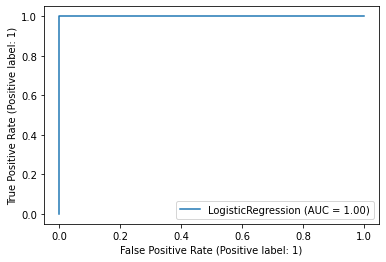

In [62]:
split_seed = 2222
split_test_size = 0.4 # 60% of data --> train set; 40% of data --> test set

# Train a logistic regressor that uses all features
X_full = pd_data.drop(['Class/ASD'], axis=1)
y = pd_data['Class/ASD']

X_full_train, X_full_test, y_train, y_test = train_test_split(X_full, y,
                                                    test_size=split_test_size,
                                                    random_state=split_seed)

model = LogisticRegression(solver='newton-cg', penalty='none') 
model.fit(X_full_train, y_train)

print("Train accuracy:", accuracy_score(y_train, model.predict(X_full_train)))
print("Train recall:", recall_score(y_train, model.predict(X_full_train)))
_ = RocCurveDisplay.from_estimator(model, X_full_train, y_train)

Test accuracy: 0.975177304964539
Test recall: 0.9487179487179487


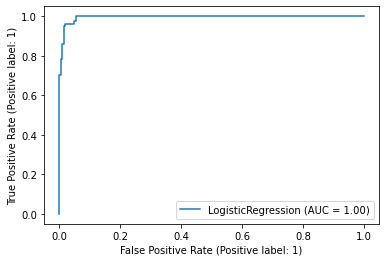

In [63]:
print("Test accuracy:", accuracy_score(y_test, model.predict(X_full_test)))
print("Test recall:", recall_score(y_test, model.predict(X_full_test)))
_ = RocCurveDisplay.from_estimator(model, X_full_test, y_test)

Sensitivity  0.9487179487179487
Specificity  0.9852941176470589
Precision  0.961038961038961
F1-score 0.9548387096774195 

              precision    recall  f1-score   support

     NOT ASD       0.98      0.99      0.98       204
         ASD       0.96      0.95      0.95        78

    accuracy                           0.98       282
   macro avg       0.97      0.97      0.97       282
weighted avg       0.98      0.98      0.98       282



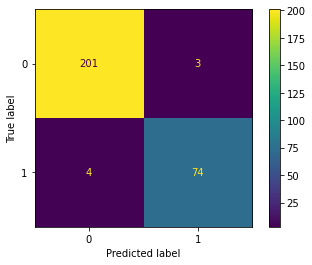

In [64]:
def sensitivity(cm):
    TP = cm[1,1]
    T = cm[1,:].sum()
    return TP / T

def specificity(cm):
    TN = cm[0,0]
    N = cm[0,:].sum()
    return TN / N

def precision(cm):
    TP = cm[1,1]
    TPFP = cm[:,1].sum()
    return TP / TPFP

def f1(cm):
    p = precision(cm)
    r = sensitivity(cm)
    return (2 * p * r) / (p + r)

cm = confusion_matrix(y_test, model.predict(X_full_test))
# Plot test confution matrix
_ = ConfusionMatrixDisplay.from_estimator(model, X_full_test, y_test)

print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm), "\n")

print(classification_report(y_test, model.predict(X_full_test), target_names=['NOT ASD', 'ASD']))

The model has a quite test good accuracy and recall scores which doesn't suggest an overfitting of the model to the data. 

The best model is the one having a ROC curve that hugs the top left corner, that is, having a very high true positive rate and a very lor false positive rate. The diagonal represents a random guess model that (in the case of two classes, which is ours) output positive with $50$% probability.

In our scenario, Logistic Regression involving all features at disposal performs excellent (test AUC $= 1$ and F$1$-score $= 0.95$).

Depending on the application, we may want to increase the sensitivity for a specific class (e.g., in a clinical test we may prefer to say that the patient is positive even if it is not, rather than missing a positive patient).

By default (and we will follow that parameter), a $50$% threshold is used to discriminate between two classes. However, if we want to increase the sensitivity of a class we can lower its threshold, therefore more likely predicting that class over the alternative.

In [65]:
def predict_th(model, X, th):
    prob = model.predict_proba(X)
    y = prob[:,1] >= th
    return y

cm = confusion_matrix(y_test, predict_th(model, X_full_test, th=0.01))

print("Sensitivity ", sensitivity(cm))

Sensitivity  0.9615384615384616


Back to us, with all variables in game we built an almost perfect model in terms of test accuracy and recall. However, let's see if we can reach the same excellent results with a less number of variables and also if it is even possible to improve the F$1$-score.

## Forward Feature Selection

Forward Feature Selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model. Being $p$ the number of features, its computational complexity is $O(p^2)$.

We will use the cross validation accuracy (or classification error) to decide which is the best number of features to select, while the train accuracy/error for selecting the candidates.

In [66]:
def accuracy(y_pred, y_true):
    return (y_pred == y_true).mean()

def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator   

def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    
    return evaluator

def get_val_evaluator(scorer, val_size=0.1):
    def evaluator(model, X, y, trained=False):
        X_train_small, X_val, y_train_small, y_val = train_test_split(X, y, 
                                                                      test_size=val_size,
                                                                      random_state=0)
        
        if not trained:
            model = model.fit(X_train_small, y_train_small)
        score = scorer(model, X_val, y_val) 
        
        return model, score
    
    return evaluator

def forward_selection(classifier, Xtrain_pd, ytrain, Xtest_pd, ytest,
                      candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                      subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                      test_evaluator=None, test_argbest=None,
                      candidates_scorer_name=None,  # Name of 2. figure
                      subsets_scorer_name=None,     # Name of 3. figure
                      verbose=True, weight_step3=0):   
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    # subsets_* are lists containing one value for each Mk model (the best of the Mk candidates)
    subsets_test = []
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    plt.figure()
    candidate_fig = plt.subplot(111) # A global matplotlib figure
    num_evaluations = 0        # A counter to keep track of the total number of trials
    
    selected_features = []
    all_features = Xtrain_pd.columns
    
    
    # 1. Train M0
    # ===========
    model = DummyRegressor()
    # Compute (2.b) metrics
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    _ = candidate_fig.scatter([0], [score], color="b")
    # Compute metric for step 3.
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    _, score = test_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_test.append(score)
    
    # 2. Evaluate all Mk candidates with
    #    k=0...P features
    # =========================================
    for dim in range(num_features):
        candidate_metrics = [] # Keep track of candidates metrics. Will be used to select the best
        candidate_models = []  # Keep track of candidates trained models
        
        # 2.a Fixed the number of features 'dim', look at
        #     all the possible candidate models with that
        #     cardinality
        # ===============================================
        remaining_features = all_features.difference(selected_features)
        
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            model = classifier
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([Xtrain_sub.shape[-1]]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
        # 2.b Select the best candidate among those using
        #     the same number of features (2.a)
        # ===============================================
        idx_best_candidate = candidates_argbest(candidate_metrics)
        # Update selected feature
        selected_features.append(remaining_features[idx_best_candidate])
        # Save best candidate features
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        
        
        # Compute metric for step 3.
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        best_subset_Xtest = Xtest_pd[best_features].to_numpy()
        _, score = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score)
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim+1, dim+1, best_features))
            print("M{} subset score (3.): {}".format(dim+1, score))
        
    # 3. Among all best candidates with increasing number
    #    of features, select the best one
    # ===================================================
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n Best configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()
    
    # Plot a figure to show how the 3. metric evolves
    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()

............
Best model (M1) with 1 features: ['A9_Score']
M1 subset score (3.): 0.8625692137320045
............
Best model (M2) with 2 features: ['A9_Score', 'A3_Score']
M2 subset score (3.): 0.900498338870432
............
Best model (M3) with 3 features: ['A9_Score', 'A3_Score', 'A4_Score']
M3 subset score (3.): 0.9076411960132891
............
Best model (M4) with 4 features: ['A9_Score', 'A3_Score', 'A4_Score', 'A5_Score']
M4 subset score (3.): 0.9147840531561462
............
Best model (M5) with 5 features: ['A9_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A10_Score']
M5 subset score (3.): 0.9291251384274639
............
Best model (M6) with 6 features: ['A9_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A10_Score', 'A8_Score']
M6 subset score (3.): 0.9361018826135105
............
Best model (M7) with 7 features: ['A9_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A10_Score', 'A8_Score', 'A6_Score']
M7 subset score (3.): 0.9528239202657808
............
Best model (M8) with 8 features: 

............
Best model (M27) with 27 features: ['A9_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A10_Score', 'A8_Score', 'A6_Score', 'A1_Score', 'ethnicity_Hispanic', 'country_of_res_Australia', 'country_of_res_France', 'age', 'country_of_res_India', 'country_of_res_Canada', 'who_is_completing_the_test_Parent', 'country_of_res_Sri Lanka', 'ethnicity_Black', 'ethnicity_Turkish', 'gender', 'who_is_completing_the_test_Health care professional', 'who_is_completing_the_test_Relative', 'who_is_completing_the_test_Self', 'used_app_before', 'country_of_res_Netherlands', 'ethnicity_Pasifika', 'country_of_res_Jordan', 'jaundice']
M27 subset score (3.): 0.9550941306755261
............
Best model (M28) with 28 features: ['A9_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A10_Score', 'A8_Score', 'A6_Score', 'A1_Score', 'ethnicity_Hispanic', 'country_of_res_Australia', 'country_of_res_France', 'age', 'country_of_res_India', 'country_of_res_Canada', 'who_is_completing_the_test_Parent', 'country_of_res

............
Best model (M38) with 38 features: ['A9_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A10_Score', 'A8_Score', 'A6_Score', 'A1_Score', 'ethnicity_Hispanic', 'country_of_res_Australia', 'country_of_res_France', 'age', 'country_of_res_India', 'country_of_res_Canada', 'who_is_completing_the_test_Parent', 'country_of_res_Sri Lanka', 'ethnicity_Black', 'ethnicity_Turkish', 'gender', 'who_is_completing_the_test_Health care professional', 'who_is_completing_the_test_Relative', 'who_is_completing_the_test_Self', 'used_app_before', 'country_of_res_Netherlands', 'ethnicity_Pasifika', 'country_of_res_Jordan', 'jaundice', 'country_of_res_Others', 'family_member_with_pdd', 'country_of_res_New Zealand', 'A7_Score', 'A2_Score', 'country_of_res_United Kingdom', 'ethnicity_South Asian', 'ethnicity_Middle Eastern', 'country_of_res_United Arab Emirates', 'ethnicity_Latino', 'ethnicity_Others']
M38 subset score (3.): 0.9786821705426357
............
Best model (M39) with 39 features: ['A9_Score'

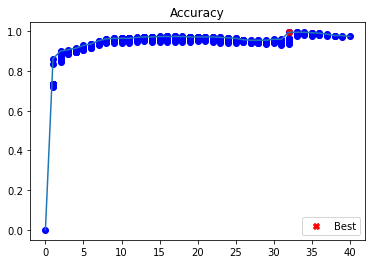

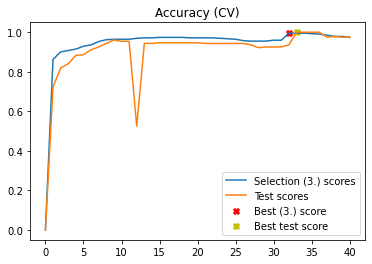

In [67]:
cv = 10

forward_selection(LogisticRegression(solver="newton-cg", penalty='none'),
                  X_full_train, y_train, X_full_test, y_test,
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # 2.
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # 3.
                  get_evaluator(make_scorer(accuracy)), np.argmax, # test
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

We notice that as an <i>A$n$_Score</i> ($n \in {1, ..., 10}$) is added, the subset score grows. As Forward Feature Selection algorithm keeps adding features until best subset score is reached without reconsidering previous choices (i.e., without removing previously added features, Forward Feature Selection is a greedy algorithm), we can see when the last <i>A$n$_Score</i> (which is <i>A$2$_Score</i>) is added the subset score reaches its best value (then the score decreases).

This suggests us using only the 10 <i>A$n$_Score</i> (without considering the ten individuals characteristics at all) we can build a perfect Logistic Regression model in terms of accuracy and recall for classifying autism.

Train accuracy: 1.0
Train recall: 1.0


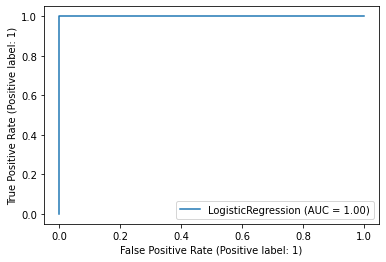

In [68]:
X_feat = ['A6_Score', 'A4_Score', 'A9_Score', 'A8_Score', 'A1_Score',
          'A2_Score', 'A5_Score', 'A7_Score', 'A3_Score', 'A10_Score']
        
X = pd_data[X_feat]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=split_seed)

model = LogisticRegression(solver='newton-cg', penalty='none') 
model.fit(X_train, y_train)           

print("Train accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Train recall:", recall_score(y_train, model.predict(X_train)))
_ = RocCurveDisplay.from_estimator(model, X_train, y_train)

Test accuracy: 1.0
Test recall: 1.0


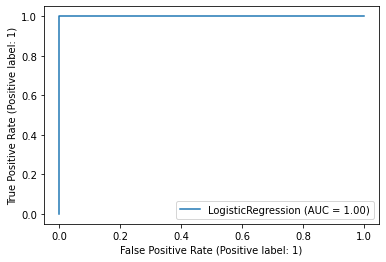

In [69]:
print("Test accuracy:", accuracy_score(y_test, model.predict(X_test)))
print("Test recall:", recall_score(y_test, model.predict(X_test)))
_ = RocCurveDisplay.from_estimator(model, X_test, y_test)

Sensitivity  1.0
Specificity  1.0
Precision  1.0
F1-score 1.0 

              precision    recall  f1-score   support

     NOT ASD       1.00      1.00      1.00       204
         ASD       1.00      1.00      1.00        78

    accuracy                           1.00       282
   macro avg       1.00      1.00      1.00       282
weighted avg       1.00      1.00      1.00       282



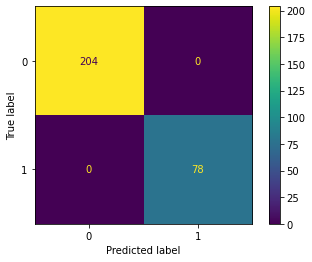

In [70]:
cm = confusion_matrix(y_test, model.predict(X_test))
# Plot test confution matrix
_ = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm), "\n")

print(classification_report(y_test, model.predict(X_test), target_names=['NOT ASD', 'ASD']))

## Feature selection with Lasso

The shrinkage effect of <b>L$1$-norm</b> can be used for feature selection. By gradually increasing the $\lambda$ parameter (i.e., increasing the sparsity of the model), the parameters that go to zero first will likely be the least important ones.

To ensure parameters are within the same ranges for different lambda values, we first normalize the data to have $0$ mean and unitary standard deviation.

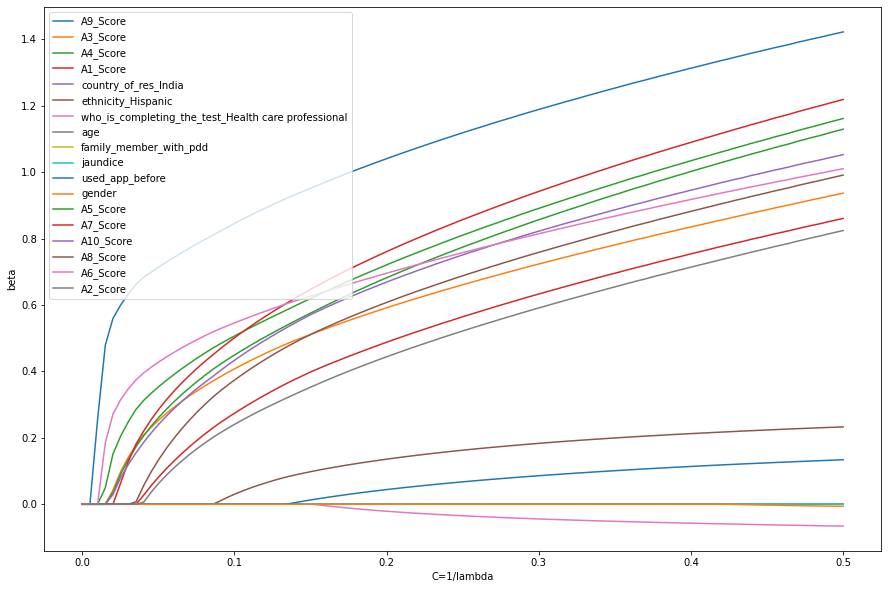

In [71]:
C_vals = np.linspace(1e-4, 0.5, 100) # The 'C' argument controls the lambda parameter
                                     # in the loss (defined as the opposite of lambda):
                                     # smaller values specify stronger regularization.
betas = []

# Subset of features including all An_Scores and some representative others
X_feat_lasso = ['A9_Score', 'A3_Score', 'A4_Score', 'A1_Score', 'country_of_res_India', 'ethnicity_Hispanic',
                'who_is_completing_the_test_Health care professional',
                'age', 'family_member_with_pdd',
                'jaundice', 'used_app_before', 'gender','A5_Score', 'A7_Score', 'A10_Score',
                'A8_Score', 'A6_Score', 'A2_Score'] 

X_lasso = pd_data[X_feat_lasso]

X_train_lasso, X_test_lasso, y_train, y_test = train_test_split(X_lasso, y, test_size=split_test_size, 
                                                                random_state=split_seed)

X_std = preprocessing.scale(X_train_lasso)

for C in C_vals:
    model = LogisticRegression(solver='liblinear', penalty='l1', C=C) # Note: L1-norm regularization
                                                                 # is not available for all the solvers.
    model.fit(X_std, y_train)
    beta = model.coef_.reshape(-1)
    #beta = (beta - beta.min()) / beta.ptp()
    betas.append(beta)
betas = np.stack(betas, axis=1)  # [Nfeat, NCvals]

_ = plt.figure(figsize=(15,10))
for beta, name in zip(betas, X_feat_lasso):
    _ = plt.plot(C_vals, beta, label=name)
_ = plt.legend()
_ = plt.xlabel("C=1/lambda")
_ = plt.ylabel("beta")

If we read the graph from left to right, that is, from very high regularization (left) to low regularization (right), we see a behaviour similar to the one observed with forward feature selection. 

- The last feature to disappear is <i>A_$9$Score</i>, so we can think of that feature as the most important one for prediction, with <i>A_$6$Score</i> and <i>A_$4$Score</i> following. We already knew these features are also correlated with the <i>Class/ASD</i> outcome.
- The first one to go to zero, instead, is <i>gender</i>, which was also one of the last being added to Forward Feature Selection.

Just for the sake of curiosity, let's try to fit a logistic model with only three meaningful features: <i>A_$9$Score</i>,  <i>A_$6$Score</i> and <i>A_$5$Score</i>.

Train accuracy: 0.8957345971563981
Train recall: 0.7927927927927928


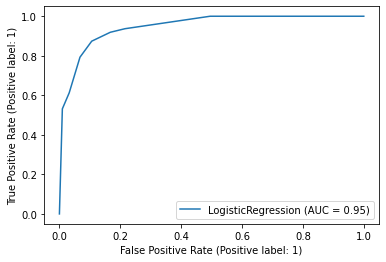

In [72]:
X_feat_small = ['A9_Score', 'A6_Score', 'A4_Score']
        
X_small = pd_data[X_feat_small]

X_train_small, X_test_small, y_train, y_test = train_test_split(X_small, y, test_size=split_test_size, 
                                                                random_state=split_seed)

model = LogisticRegression(solver='liblinear', penalty='l1')
model.fit(X_train_small, y_train)           

print("Train accuracy:", accuracy_score(y_train, model.predict(X_train_small)))
print("Train recall:", recall_score(y_train, model.predict(X_train_small)))
_ = RocCurveDisplay.from_estimator(model, X_train_small, y_train)

Test accuracy: 0.8723404255319149
Test recall: 0.782051282051282


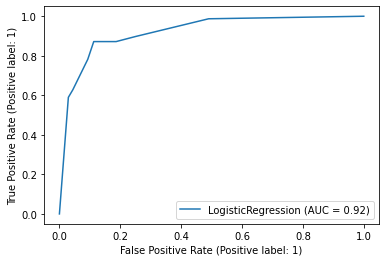

In [73]:
print("Test accuracy:", accuracy_score(y_test, model.predict(X_test_small)))
print("Test recall:", recall_score(y_test, model.predict(X_test_small)))
_ = RocCurveDisplay.from_estimator(model, X_test_small, y_test)

Sensitivity  0.782051282051282
Specificity  0.9068627450980392
Precision  0.7625
F1-score 0.7721518987341772 

              precision    recall  f1-score   support

     NOT ASD       0.92      0.91      0.91       204
         ASD       0.76      0.78      0.77        78

    accuracy                           0.87       282
   macro avg       0.84      0.84      0.84       282
weighted avg       0.87      0.87      0.87       282



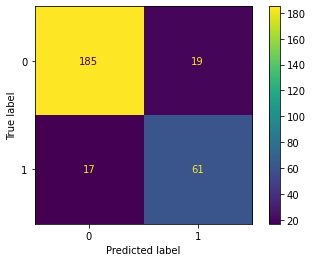

In [74]:
cm = confusion_matrix(y_test, model.predict(X_test_small))
# Plot test confution matrix
_ = ConfusionMatrixDisplay.from_estimator(model, X_test_small, y_test)

print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm), "\n")

print(classification_report(y_test, model.predict(X_test_small), target_names=['NOT ASD', 'ASD']))

We obtained a pretty good model only considering those features.

Now let's go back to our Lasso CV model: we now have to find the best $C$ according to cross-validation.

In [75]:
model = Pipeline([('scaler',preprocessing.StandardScaler()), 
                 ('classifier',LogisticRegression(solver='liblinear', penalty='l1'))])

params = {'classifier__C': C_vals}
cv = GridSearchCV(model, params, refit=True, cv=10, verbose=False, scoring=make_scorer(accuracy_score))
# Same results with recall_score instead of accuracy
cv.fit(X_full_train, y_train)

best_C = cv.best_params_["classifier__C"]
print("The best parameter for lasso is: C =", best_C)
print("Which corresponds to: lambda = 1/C =", 1 / best_C)

The best parameter for lasso is: C = 0.39396060606060607
Which corresponds to: lambda = 1/C = 2.538324859430646


Train accuracy: 0.9976303317535545
Train recall: 0.990990990990991


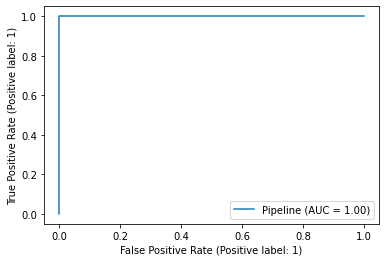

In [76]:
model = Pipeline([('scaler',preprocessing.StandardScaler()), 
                 ('classifier',LogisticRegression(solver='liblinear', penalty='l1', C=best_C))])
model.fit(X_full_train, y_train)

print("Train accuracy:", accuracy_score(y_train, model.predict(X_full_train)))
print("Train recall:", recall_score(y_train, model.predict(X_full_train)))
_ = RocCurveDisplay.from_estimator(model, X_full_train, y_train)

Test accuracy: 0.9716312056737588
Test recall: 0.9487179487179487


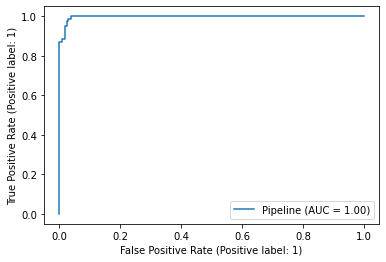

In [77]:
print("Test accuracy:", accuracy_score(y_test, model.predict(X_full_test)))
print("Test recall:", recall_score(y_test, model.predict(X_full_test)))
_ = RocCurveDisplay.from_estimator(model, X_full_test, y_test)

Sensitivity  0.9487179487179487
Specificity  0.9803921568627451
Precision  0.9487179487179487
F1-score 0.9487179487179487 

              precision    recall  f1-score   support

     NOT ASD       0.98      0.98      0.98       204
         ASD       0.95      0.95      0.95        78

    accuracy                           0.97       282
   macro avg       0.96      0.96      0.96       282
weighted avg       0.97      0.97      0.97       282



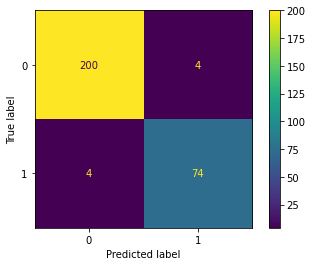

In [78]:
cm = confusion_matrix(y_test, model.predict(X_full_test))
# Plot test confution matrix
_ = ConfusionMatrixDisplay.from_estimator(model, X_full_test, y_test)

print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm), "\n")

print(classification_report(y_test, model.predict(X_full_test), target_names=['NOT ASD', 'ASD']))

Lasso results in a model pretty similar (almost identical) to the one without any normalization considering all features at disposal: this happens because $C$ found by CV is quite high ($0.3939606060606060$) and all features are still present (low shrinkage effect, as one can also appreciate from the first graph of this section plotting $C$s and betas).

## Ridge Regression
Ridge regression is a shrinkage method that fit a model containing all the predictors and shrinks the coefficients estimates toward zero, reducing their variance. It uses as shrinkage penalty the <b>L$2$-norm</b> of the vector of coefficients.

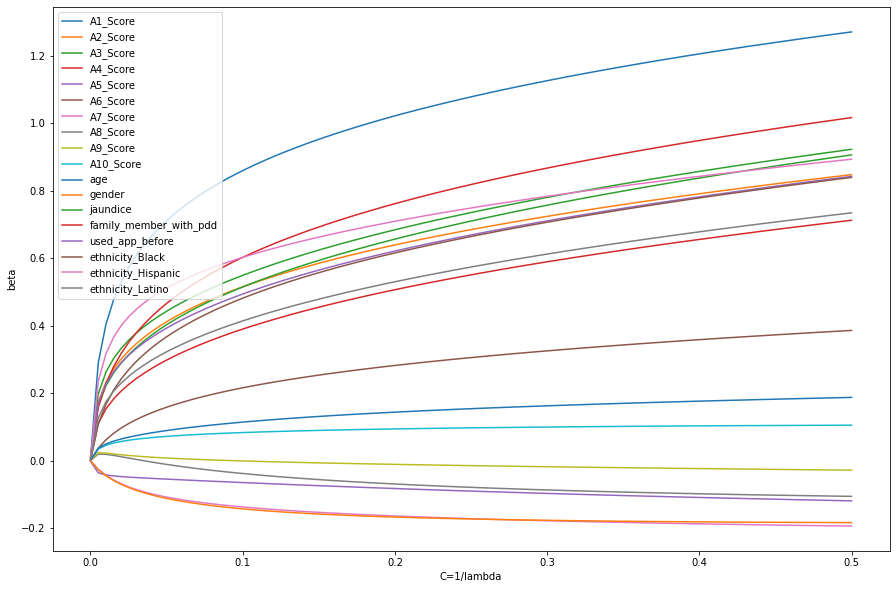

In [79]:
betas = []

for C in C_vals:
    model = LogisticRegression(solver='liblinear', penalty='l2', C=C) # Note: L2-norm regularization
                                                                      # is not available for all the solvers.
    model.fit(X_std, y_train)
    beta = model.coef_.reshape(-1)
    #beta = (beta - beta.min()) / beta.ptp()
    betas.append(beta)
betas = np.stack(betas, axis=1)  # [Nfeat, NCvals]

_ = plt.figure(figsize=(15,10))
for beta, name in zip(betas, X_full_train):
    _ = plt.plot(C_vals, beta, label=name)
_ = plt.legend()
_ = plt.xlabel("C=1/lambda")
_ = plt.ylabel("beta")

We obtained a similar graph with respect to Lasso, from which we can reach similar considerations: <i>A$1$_Score</i>, <i>A$7$_Score</i> and <i>A$4$_Score</i> are the features with highest betas for the same $C$s, therefore the most meaningful ones.

Now we select $\lambda$ according to cross-validation using accuracy as metric. 

In [80]:
model = Pipeline([('scaler',preprocessing.StandardScaler()), 
               ('classifier',LogisticRegression(solver='liblinear', penalty='l2'))])

params = {'classifier__C': C_vals}
cv = GridSearchCV(model, params, refit=True, cv=10, verbose=False, scoring=make_scorer(accuracy_score))
cv.fit(X_full_train, y_train)

best_C = cv.best_params_["classifier__C"]
print("The best parameter for ridge regression is: C =", best_C)
print("Which corresponds to: lambda = 1/C =", 1 / best_C)

The best parameter for ridge regression is: C = 0.2727727272727273
Which corresponds to: lambda = 1/C = 3.666055657390435


Train accuracy: 0.9976303317535545
Train recall: 1.0


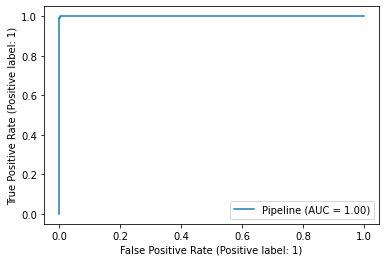

In [81]:
model = Pipeline([('scaler',preprocessing.StandardScaler()), 
                 ('classifier',LogisticRegression(solver='liblinear', penalty='l2', C=best_C))])
model.fit(X_full_train, y_train)

print("Train accuracy:", accuracy_score(y_train, model.predict(X_full_train)))
print("Train recall:", recall_score(y_train, model.predict(X_full_train)))
_ = RocCurveDisplay.from_estimator(model, X_full_train, y_train)

Test accuracy: 0.9574468085106383
Test recall: 0.9487179487179487


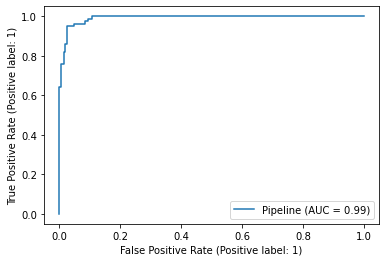

In [82]:
print("Test accuracy:", accuracy_score(y_test, model.predict(X_full_test)))
print("Test recall:", recall_score(y_test, model.predict(X_full_test)))
_ = RocCurveDisplay.from_estimator(model, X_full_test, y_test)

Sensitivity  0.9487179487179487
Specificity  0.9607843137254902
Precision  0.9024390243902439
F1-score 0.9249999999999999 

              precision    recall  f1-score   support

     NOT ASD       0.98      0.96      0.97       204
         ASD       0.90      0.95      0.92        78

    accuracy                           0.96       282
   macro avg       0.94      0.95      0.95       282
weighted avg       0.96      0.96      0.96       282



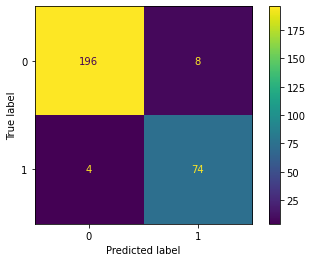

In [83]:
cm = confusion_matrix(y_test, model.predict(X_full_test))
# Plot test confution matrix
_ = ConfusionMatrixDisplay.from_estimator(model, X_full_test, y_test)

print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm), "\n")

print(classification_report(y_test, model.predict(X_full_test), target_names=['NOT ASD', 'ASD']))

As for Lasso, Ridge Regression results in a model pretty similar (almost identical) to the one without any normalization considering all features at disposal: this happens because 𝐶 found by CV is quite high ($0.2727727272727273$) and all features have a high importance (as before resulting in a low shrinkage effect, as one can also appreciate from the first graph of this section plotting $C$s and betas).

Let's now consider recall metric.

In [84]:
model = Pipeline([('scaler',preprocessing.StandardScaler()), 
                 ('classifier',LogisticRegression(solver='liblinear', penalty='l2'))])

params = {'classifier__C': C_vals}
cv = GridSearchCV(model, params, refit=True, cv=10, verbose=False, scoring=make_scorer(recall_score))
cv.fit(X_full_train, y_train)

best_C = cv.best_params_["classifier__C"]
print("The best parameter for ridge regression is: C =", best_C)
print("Which corresponds to: lambda =", 1 / best_C)

The best parameter for ridge regression is: C = 0.0001
Which corresponds to: lambda = 10000.0


Train accuracy: 0.8862559241706162
Train recall: 1.0


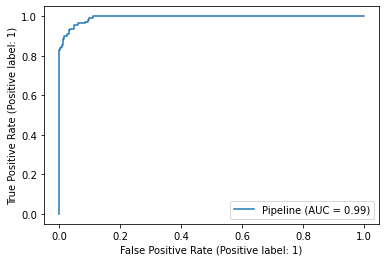

In [85]:
model = Pipeline([('scaler',preprocessing.StandardScaler()), 
                 ('classifier',LogisticRegression(solver='liblinear', penalty='l2', C=best_C))])
model.fit(X_full_train, y_train)

print("Train accuracy:", accuracy_score(y_train, model.predict(X_full_train)))
print("Train recall:", recall_score(y_train, model.predict(X_full_train)))
_ = RocCurveDisplay.from_estimator(model, X_full_train, y_train)

Test accuracy: 0.8900709219858156
Test recall: 0.9871794871794872


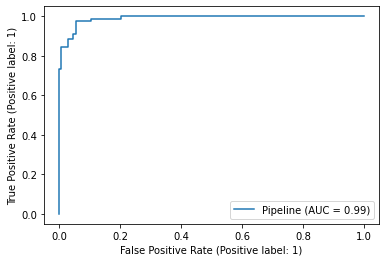

In [86]:
print("Test accuracy:", accuracy_score(y_test, model.predict(X_full_test)))
print("Test recall:", recall_score(y_test, model.predict(X_full_test)))
_ = RocCurveDisplay.from_estimator(model, X_full_test, y_test)

Sensitivity  0.9871794871794872
Specificity  0.8529411764705882
Precision  0.719626168224299
F1-score 0.8324324324324324 

              precision    recall  f1-score   support

     NOT ASD       0.99      0.85      0.92       204
         ASD       0.72      0.99      0.83        78

    accuracy                           0.89       282
   macro avg       0.86      0.92      0.88       282
weighted avg       0.92      0.89      0.89       282



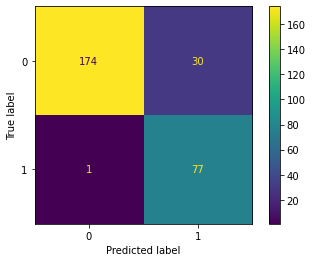

In [87]:
cm = confusion_matrix(y_test, model.predict(X_full_test))
# Plot test confution matrix
_ = ConfusionMatrixDisplay.from_estimator(model, X_full_test, y_test)

print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm), "\n")

print(classification_report(y_test, model.predict(X_full_test), target_names=['NOT ASD', 'ASD']))

Considering recall as cross-validation metric we lost specificity on test set (in fact test and train accuracy scores are too lowered in favour of recall ones).

# Linear Discriminant Analysis
Linear discriminant analysis is a classifier that uses the Bayes theorem to compute the a posteriori probability, which is then used to decide to which class each point is more likely to come from. LDA assumes that the data comes from a gaussian, with all the classes having the same variance.

Train accuracy: 0.9691943127962085
Train recall: 0.972972972972973


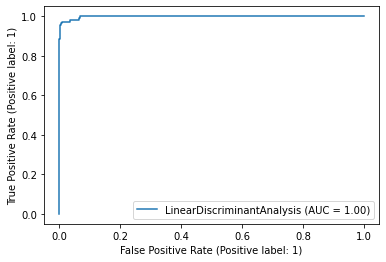

In [88]:
model = LDA(store_covariance=True).fit(X_full_train, y_train)

print("Train accuracy:", accuracy_score(y_train, model.predict(X_full_train)))
print("Train recall:", recall_score(y_train, model.predict(X_full_train)))
_ = RocCurveDisplay.from_estimator(model, X_full_train, y_train)

Test accuracy: 0.9184397163120568
Test recall: 0.8974358974358975


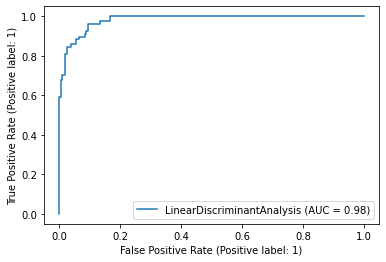

In [89]:
print("Test accuracy:", accuracy_score(y_test, model.predict(X_full_test)))
print("Test recall:", recall_score(y_test, model.predict(X_full_test)))
_ = RocCurveDisplay.from_estimator(model, X_full_test, y_test)

Sensitivity  0.8974358974358975
Specificity  0.9264705882352942
Precision  0.8235294117647058
F1-score 0.8588957055214724 

              precision    recall  f1-score   support

     NOT ASD       0.96      0.93      0.94       204
         ASD       0.82      0.90      0.86        78

    accuracy                           0.92       282
   macro avg       0.89      0.91      0.90       282
weighted avg       0.92      0.92      0.92       282



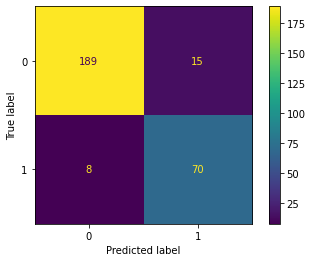

In [90]:
cm = confusion_matrix(y_test, model.predict(X_full_test))
# Plot test confution matrix
_ = ConfusionMatrixDisplay.from_estimator(model, X_full_test, y_test)

print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm), "\n")

print(classification_report(y_test, model.predict(X_full_test), target_names=['NOT ASD', 'ASD']))

In general, LDA reaches a excellent performance on this dataset, but Logistic Regression performs best. Let's see what happens by performing Forward Feature Selection (regularization methods such as Lasso and Ridge Regression cannot be used for LDA).

............
Best model (M1) with 1 features: ['A9_Score']
M1 subset score (3.): 0.8625692137320045
............
Best model (M2) with 2 features: ['A9_Score', 'A10_Score']
M2 subset score (3.): 0.8625692137320045
............
Best model (M3) with 3 features: ['A9_Score', 'A10_Score', 'A3_Score']
M3 subset score (3.): 0.8933554817275748
............
Best model (M4) with 4 features: ['A9_Score', 'A10_Score', 'A3_Score', 'A8_Score']
M4 subset score (3.): 0.9051495016611296
............
Best model (M5) with 5 features: ['A9_Score', 'A10_Score', 'A3_Score', 'A8_Score', 'A6_Score']
M5 subset score (3.): 0.9147840531561462
............
Best model (M6) with 6 features: ['A9_Score', 'A10_Score', 'A3_Score', 'A8_Score', 'A6_Score', 'A4_Score']
M6 subset score (3.): 0.9290143964562569
............
Best model (M7) with 7 features: ['A9_Score', 'A10_Score', 'A3_Score', 'A8_Score', 'A6_Score', 'A4_Score', 'A7_Score']
M7 subset score (3.): 0.9337763012181617
............
Best model (M8) with 8 featur

............
Best model (M27) with 27 features: ['A9_Score', 'A10_Score', 'A3_Score', 'A8_Score', 'A6_Score', 'A4_Score', 'A7_Score', 'A1_Score', 'country_of_res_India', 'ethnicity_Hispanic', 'A5_Score', 'country_of_res_Others', 'A2_Score', 'ethnicity_Others', 'country_of_res_France', 'who_is_completing_the_test_Parent', 'age', 'country_of_res_Australia', 'country_of_res_New Zealand', 'country_of_res_Sri Lanka', 'ethnicity_Latino', 'ethnicity_White-European', 'ethnicity_Pasifika', 'ethnicity_Turkish', 'used_app_before', 'country_of_res_Jordan', 'ethnicity_Middle Eastern']
M27 subset score (3.): 0.9715393133997786
............
Best model (M28) with 28 features: ['A9_Score', 'A10_Score', 'A3_Score', 'A8_Score', 'A6_Score', 'A4_Score', 'A7_Score', 'A1_Score', 'country_of_res_India', 'ethnicity_Hispanic', 'A5_Score', 'country_of_res_Others', 'A2_Score', 'ethnicity_Others', 'country_of_res_France', 'who_is_completing_the_test_Parent', 'age', 'country_of_res_Australia', 'country_of_res_New Z

............
Best model (M39) with 39 features: ['A9_Score', 'A10_Score', 'A3_Score', 'A8_Score', 'A6_Score', 'A4_Score', 'A7_Score', 'A1_Score', 'country_of_res_India', 'ethnicity_Hispanic', 'A5_Score', 'country_of_res_Others', 'A2_Score', 'ethnicity_Others', 'country_of_res_France', 'who_is_completing_the_test_Parent', 'age', 'country_of_res_Australia', 'country_of_res_New Zealand', 'country_of_res_Sri Lanka', 'ethnicity_Latino', 'ethnicity_White-European', 'ethnicity_Pasifika', 'ethnicity_Turkish', 'used_app_before', 'country_of_res_Jordan', 'ethnicity_Middle Eastern', 'ethnicity_South Asian', 'country_of_res_United Arab Emirates', 'family_member_with_pdd', 'who_is_completing_the_test_Relative', 'country_of_res_Netherlands', 'who_is_completing_the_test_Health care professional', 'who_is_completing_the_test_Self', 'jaundice', 'country_of_res_United States', 'country_of_res_United Kingdom', 'country_of_res_Canada', 'ethnicity_Black']
M39 subset score (3.): 0.9478405315614618
.........

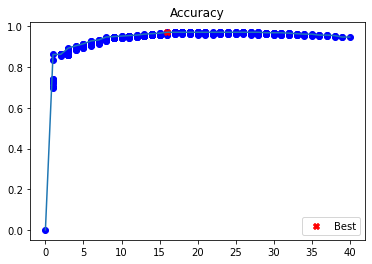

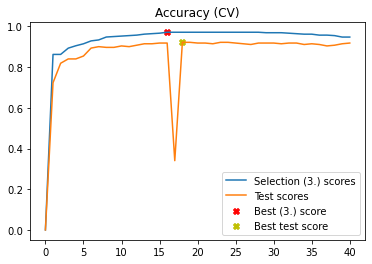

In [91]:
cv = 10

forward_selection(LDA(store_covariance=True),
                  X_full_train, y_train, X_full_test, y_test,
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # 2.
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # 3.
                  get_evaluator(make_scorer(accuracy)), np.argmax, # test
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

To reach the best subset possible, LDA adds some features to <i>A$n$_Score</i> ($n \in {1, ..., 10}$).

Train accuracy: 0.9739336492890995
Train recall: 0.963963963963964


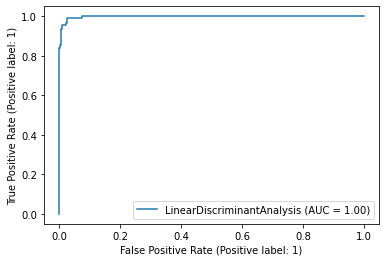

In [92]:
X_feat = ['A9_Score', 'A10_Score', 'A3_Score', 'A8_Score', 'A6_Score', 'A4_Score', 'A7_Score',
          'A1_Score', 'country_of_res_India', 'ethnicity_Hispanic', 'A5_Score', 'country_of_res_Others',
          'A2_Score', 'ethnicity_Others', 'country_of_res_France', 'who_is_completing_the_test_Parent']
        
X = pd_data[X_feat]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=split_seed)

model = LDA(store_covariance=True)
model.fit(X_train, y_train)

print("Train accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Train recall:", recall_score(y_train, model.predict(X_train)))
_ = RocCurveDisplay.from_estimator(model, X_train, y_train)

Test accuracy: 0.9148936170212766
Test recall: 0.8974358974358975


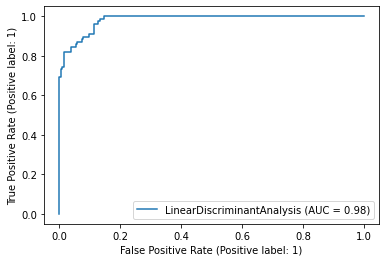

In [93]:
print("Test accuracy:", accuracy_score(y_test, model.predict(X_test)))
print("Test recall:", recall_score(y_test, model.predict(X_test)))
_ = RocCurveDisplay.from_estimator(model, X_test, y_test)

Sensitivity  0.8974358974358975
Specificity  0.9215686274509803
Precision  0.813953488372093
F1-score 0.8536585365853658 

              precision    recall  f1-score   support

     NOT ASD       0.96      0.92      0.94       204
         ASD       0.81      0.90      0.85        78

    accuracy                           0.91       282
   macro avg       0.89      0.91      0.90       282
weighted avg       0.92      0.91      0.92       282



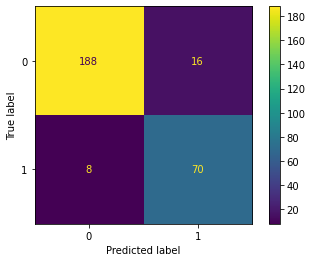

In [94]:
cm = confusion_matrix(y_test, model.predict(X_test))
# Plot test confution matrix
_ = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm), "\n")

print(classification_report(y_test, model.predict(X_test), target_names=['NOT ASD', 'ASD']))

Quite similar result to LDA without feature selection, but what is interesting here is we reached this result with a less number of features involved.

## LDA with polynomial features
<b>Best degree</b>: as usual, if we are interested in finding the optimal hyper-parameter for an agorithm we can use cross-validation and `GridSearchCV`. We'll take into account, as before, accuracy and recall metrics.

  (best 1) CV accuracy: 0.9478405315614618
  (best 1) Test accuracy: 0.9184397163120568


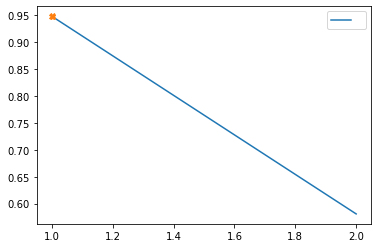

In [95]:
model = Pipeline([('poly', PolynomialFeatures()),
                  ('lda', LDA(store_covariance=True))])
params = {'poly__degree': range(1, 3)}
cv = GridSearchCV(model, params, refit=True, cv=10, 
                  scoring=make_scorer(accuracy_score))
cv.fit(X_full_train, y_train)

def show_results_acc(cv, X_test, params, prefix=''):
    prefix = ' '+prefix    
    results = pd.DataFrame(cv.cv_results_)
    # Plot the CV (mean) scores for all possible parameters
    plt.plot(results[params], results['mean_test_score'], label=prefix)

    # Find the best
    best_idx = np.argmax(results['mean_test_score'])
    # Plot it as a cross
    plt.plot(results[params][best_idx],results['mean_test_score'][best_idx], marker='X')
    plt.legend()

    print(prefix, f"(best {results[params][best_idx]}) CV accuracy:",  cv.best_score_)
    print(prefix, f"(best {results[params][best_idx]}) Test accuracy:", accuracy_score(y_test, cv.best_estimator_.predict(X_test)))

show_results_acc(cv, X_full_test, 'param_poly__degree')

Same holds true for recall:

  (best 1) CV recall: 0.9545454545454545
  (best 1) Test recall: 0.8974358974358975


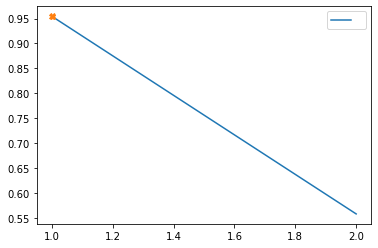

In [96]:
model = Pipeline([('poly', PolynomialFeatures()),
                  ('lda', LDA(store_covariance=True))])
params = {'poly__degree': range(1, 3)}
cv = GridSearchCV(model, params, refit=True, cv=10, 
                  scoring=make_scorer(recall_score))
cv.fit(X_full_train, y_train)

def show_results_rec(cv, X_test, params, prefix=''):
    prefix = ' '+prefix    
    results = pd.DataFrame(cv.cv_results_)
    # Plot the CV (mean) scores for all possible parameters
    plt.plot(results[params], results['mean_test_score'], label=prefix)

    # Find the best
    best_idx = np.argmax(results['mean_test_score'])
    # Plot it as a cross
    plt.plot(results[params][best_idx],results['mean_test_score'][best_idx], marker='X')
    plt.legend()

    print(prefix, f"(best {results[params][best_idx]}) CV recall:",  cv.best_score_)
    print(prefix, f"(best {results[params][best_idx]}) Test recall:", recall_score(y_test, cv.best_estimator_.predict(X_test)))

show_results_rec(cv, X_full_test, 'param_poly__degree')

Considering these metrics, we obtain that degree $= 1$ is the best. Degrees $\geq 2$ end up in <b>overfitting</b>.

# Quadratic Discriminant Analysis

Like LDA, quadratic discriminant analysis classifies data based on their a posteriori probability, which is computed through the Bayes theorem. QDA differs from LDA in the fact that it doesn't assume that all the classes shares the same variance: the data is assumed to be drawn by gaussian distributions with different mean and variance.

Train accuracy: 0.3127962085308057
Train recall: 1.0


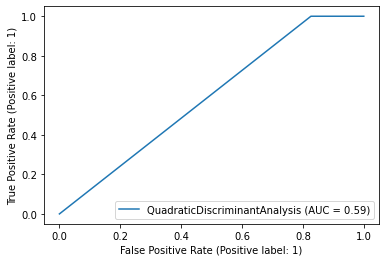

In [97]:
model = QDA(store_covariance=True)
model = model.fit(X_full_train, y_train)

print("Train accuracy:", accuracy_score(y_train, model.predict(X_full_train)))
print("Train recall:", recall_score(y_train, model.predict(X_full_train)))
_ = RocCurveDisplay.from_estimator(model, X_full_train, y_train)

Test accuracy: 0.3120567375886525
Test recall: 0.9487179487179487


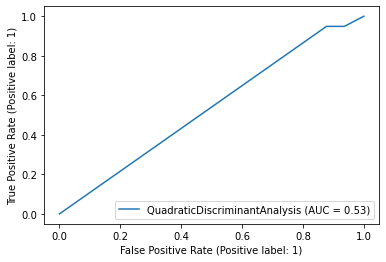

In [98]:
print("Test accuracy:", accuracy_score(y_test, model.predict(X_full_test)))
print("Test recall:", recall_score(y_test, model.predict(X_full_test)))
_ = RocCurveDisplay.from_estimator(model, X_full_test, y_test)

Sensitivity  0.9487179487179487
Specificity  0.06862745098039216
Precision  0.2803030303030303
F1-score 0.4327485380116959 

              precision    recall  f1-score   support

         ASD       0.78      0.07      0.13       204
     NOT ASD       0.28      0.95      0.43        78

    accuracy                           0.31       282
   macro avg       0.53      0.51      0.28       282
weighted avg       0.64      0.31      0.21       282



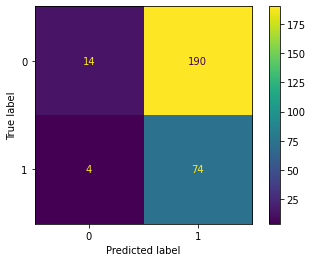

In [99]:
cm = confusion_matrix(y_test, model.predict(X_full_test))
# Plot test confution matrix
_ = ConfusionMatrixDisplay.from_estimator(model, X_full_test, y_test)

print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm), "\n")

print(classification_report(y_test, model.predict(X_full_test), target_names=['ASD', 'NOT ASD']))

QDA with all features creates an almost random classifier (train and test accuracy are below $0.5$). Let's see if QDA improves considering Forward Feature Selection.

............
Best model (M1) with 1 features: ['A9_Score']
M1 subset score (3.): 0.8625692137320045
............
Best model (M2) with 2 features: ['A9_Score', 'A5_Score']
M2 subset score (3.): 0.8982281284606867
............
Best model (M3) with 3 features: ['A9_Score', 'A5_Score', 'country_of_res_United Arab Emirates']
M3 subset score (3.): 0.9052602436323367
............
Best model (M4) with 4 features: ['A9_Score', 'A5_Score', 'country_of_res_United Arab Emirates', 'family_member_with_pdd']
M4 subset score (3.): 0.9076411960132891
............
Best model (M5) with 5 features: ['A9_Score', 'A5_Score', 'country_of_res_United Arab Emirates', 'family_member_with_pdd', 'A3_Score']
M5 subset score (3.): 0.9100775193798449
............
Best model (M6) with 6 features: ['A9_Score', 'A5_Score', 'country_of_res_United Arab Emirates', 'family_member_with_pdd', 'A3_Score', 'A4_Score']
M6 subset score (3.): 0.9195459579180509
............
Best model (M7) with 7 features: ['A9_Score', 'A5_Score',

............
Best model (M26) with 26 features: ['A9_Score', 'A5_Score', 'country_of_res_United Arab Emirates', 'family_member_with_pdd', 'A3_Score', 'A4_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'ethnicity_White-European', 'country_of_res_Others', 'A2_Score', 'country_of_res_United Kingdom', 'A10_Score', 'age', 'country_of_res_United States', 'ethnicity_Black', 'A1_Score', 'gender', 'who_is_completing_the_test_Relative', 'country_of_res_Australia', 'ethnicity_Hispanic', 'country_of_res_India', 'country_of_res_Netherlands', 'country_of_res_New Zealand', 'ethnicity_Others']
M26 subset score (3.): 0.9312292358803986
............
Best model (M27) with 27 features: ['A9_Score', 'A5_Score', 'country_of_res_United Arab Emirates', 'family_member_with_pdd', 'A3_Score', 'A4_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'ethnicity_White-European', 'country_of_res_Others', 'A2_Score', 'country_of_res_United Kingdom', 'A10_Score', 'age', 'country_of_res_United States', 'ethnicity_Black', 'A1_Score

............
Best model (M37) with 37 features: ['A9_Score', 'A5_Score', 'country_of_res_United Arab Emirates', 'family_member_with_pdd', 'A3_Score', 'A4_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'ethnicity_White-European', 'country_of_res_Others', 'A2_Score', 'country_of_res_United Kingdom', 'A10_Score', 'age', 'country_of_res_United States', 'ethnicity_Black', 'A1_Score', 'gender', 'who_is_completing_the_test_Relative', 'country_of_res_Australia', 'ethnicity_Hispanic', 'country_of_res_India', 'country_of_res_Netherlands', 'country_of_res_New Zealand', 'ethnicity_Others', 'ethnicity_Latino', 'who_is_completing_the_test_Parent', 'jaundice', 'who_is_completing_the_test_Self', 'ethnicity_Middle Eastern', 'country_of_res_France', 'used_app_before', 'ethnicity_Pasifika', 'ethnicity_South Asian', 'country_of_res_Canada', 'country_of_res_Jordan']
M37 subset score (3.): 0.6746954595791805
............
Best model (M38) with 38 features: ['A9_Score', 'A5_Score', 'country_of_res_United Arab Em

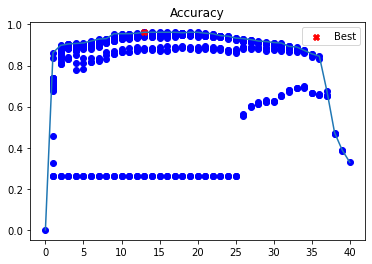

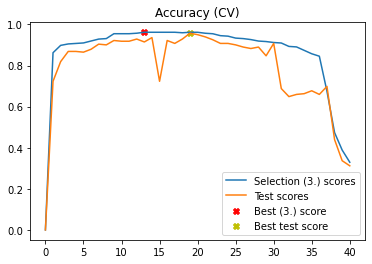

In [100]:
cv = 10

forward_selection(QDA(store_covariance=True),
                  X_full_train, y_train, X_full_test, y_test,
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # 2.
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # 3.
                  get_evaluator(make_scorer(accuracy)), np.argmax, # test
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

Train accuracy: 0.9597156398104265
Train recall: 0.9369369369369369


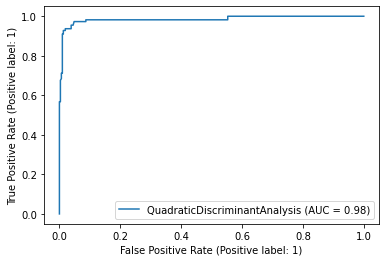

In [101]:
X_feat = ['A9_Score', 'A5_Score', 'country_of_res_United Arab Emirates', 'family_member_with_pdd', 'A3_Score',
          'A4_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'ethnicity_White-European', 'country_of_res_Others',
          'A2_Score', 'country_of_res_United Kingdom']
        
X = pd_data[X_feat]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=split_seed)

model = QDA(store_covariance=True)
model.fit(X_train, y_train)

print("Train accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Train recall:", recall_score(y_train, model.predict(X_train)))
_ = RocCurveDisplay.from_estimator(model, X_train, y_train)

Test accuracy: 0.9326241134751773
Test recall: 0.9358974358974359


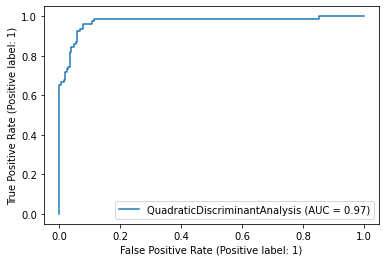

In [102]:
print("Test accuracy:", accuracy_score(y_test, model.predict(X_test)))
print("Test recall:", recall_score(y_test, model.predict(X_test)))
_ = RocCurveDisplay.from_estimator(model, X_test, y_test)

Sensitivity  0.9358974358974359
Specificity  0.9313725490196079
Precision  0.8390804597701149
F1-score 0.8848484848484849 

              precision    recall  f1-score   support

     NOT ASD       0.97      0.93      0.95       204
         ASD       0.84      0.94      0.88        78

    accuracy                           0.93       282
   macro avg       0.91      0.93      0.92       282
weighted avg       0.94      0.93      0.93       282



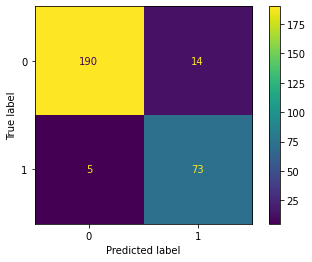

In [103]:
cm = confusion_matrix(y_test, model.predict(X_test))
# Plot test confution matrix
_ = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm), "\n")

print(classification_report(y_test, model.predict(X_test), target_names=['NOT ASD', 'ASD']))

With the features selected by Forward Feature Selection we indeed end up in a powerful model.

# K-Nearest Neighbors

KNN is a non-parametric model used to approximate the Bayes Classifier. The algorithm is very simple:
- the training phase only consists in storing the training dataset
- at prediction, given a query point to classify, we identify the $K$ closest training points and predict as class the most frequent class among the selected neighbors.

## Hyperparameters selection

As usual we can use grid search and cross validation to select the best $K$ for the dataset. In this case:
- a large value of $K$ results in a smoother boundary
- a small value of $K$ in a more complex model

### Does feature normalization matter?

KNN relies on sample distances to perform prediction. In most cases, having normalized features that all span on the same range allow samples to be compared more reliably.

We usually have two options for normalizing features:
- range normalization: $x' = \frac{x - x_{min}}{x_{max} - x_{min}}$ which makes all the features have values between $[0, 1]$
- z-score normalization: $x' = \frac{x - \mu}{\sigma}$ which make feature have 0 mean and unitary variance

Let's try both and check how the cross validation accuracy and recall change.

 Unnormalized (best 5) CV accuracy: 0.9028239202657808
 Unnormalized (best 5) Test accuracy: 0.8794326241134752
 StandardScaler (best 19) CV accuracy: 0.9218161683277962
 StandardScaler (best 19) Test accuracy: 0.9184397163120568
 MinMaxScaler (best 8) CV accuracy: 0.9527131782945737
 MinMaxScaler (best 8) Test accuracy: 0.9326241134751773


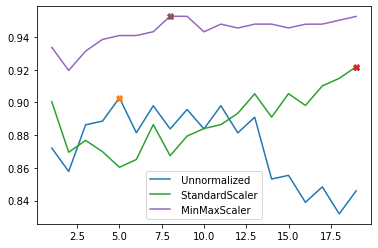

In [104]:
model = KNeighborsClassifier()
params = {'n_neighbors': range(1, 20)}
scorer = make_scorer(accuracy_score)

cv = GridSearchCV(model,params,cv=10,scoring=scorer)
cv.fit(X_full_train, y_train)

params = {'knn__n_neighbors': range(1, 20)}
model_std = Pipeline([
    ('norm', StandardScaler()),
    ('knn', KNeighborsClassifier())])
cv_std = GridSearchCV(model_std, params, refit=True, cv=10,
                     scoring=make_scorer(accuracy_score))
cv_std.fit(X_full_train, y_train)

model_minmax = Pipeline([
    ('norm', MinMaxScaler()),
    ('knn', KNeighborsClassifier())])
cv_minmax = GridSearchCV(model_minmax, params, refit=True, cv=10,
                        scoring=make_scorer(accuracy_score))
cv_minmax.fit(X_full_train, y_train)

# Plot the cv lines
show_results_acc(cv, X_full_test, "param_n_neighbors", prefix="Unnormalized")
show_results_acc(cv_std, X_full_test, 'param_knn__n_neighbors', "StandardScaler")
show_results_acc(cv_minmax, X_full_test, 'param_knn__n_neighbors', "MinMaxScaler")

Train accuracy: 0.9620853080568721
Train recall: 0.918918918918919


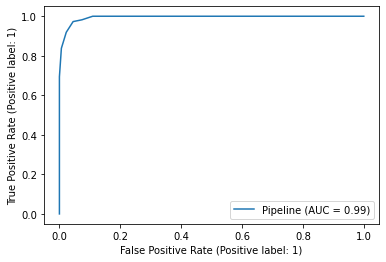

In [105]:
Model_best = cv_minmax.best_estimator_

print("Train accuracy:", accuracy_score(y_train, Model_best.predict(X_full_train)))
print("Train recall:", recall_score(y_train, Model_best.predict(X_full_train)))
_ = RocCurveDisplay.from_estimator(Model_best, X_full_train, y_train)

Test accuracy: 0.9326241134751773
Test recall: 0.8461538461538461


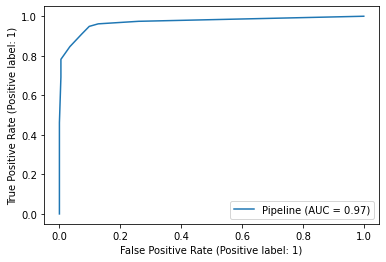

In [106]:
print("Test accuracy:", accuracy_score(y_test, Model_best.predict(X_full_test)))
print("Test recall:", recall_score(y_test, Model_best.predict(X_full_test)))
_ = RocCurveDisplay.from_estimator(Model_best, X_full_test, y_test)

Sensitivity  0.8461538461538461
Specificity  0.9656862745098039
Precision  0.9041095890410958
F1-score 0.8741721854304636 

              precision    recall  f1-score   support

     NOT ASD       0.94      0.97      0.95       204
         ASD       0.90      0.85      0.87        78

    accuracy                           0.93       282
   macro avg       0.92      0.91      0.91       282
weighted avg       0.93      0.93      0.93       282



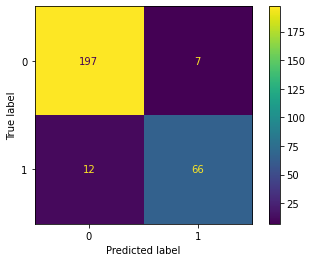

In [107]:
cm = confusion_matrix(y_test, Model_best.predict(X_full_test))
# Plot test confution matrix
_ = ConfusionMatrixDisplay.from_estimator(Model_best, X_full_test, y_test)

print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm), "\n")

print(classification_report(y_test, Model_best.predict(X_full_test), target_names=['NOT ASD', 'ASD']))

 Unnormalized (best 3) CV recall: 0.8121212121212121
 Unnormalized (best 3) Test recall: 0.8333333333333334
 StandardScaler (best 1) CV recall: 0.8204545454545455
 StandardScaler (best 1) Test recall: 0.782051282051282
 MinMaxScaler (best 9) CV recall: 0.9106060606060605
 MinMaxScaler (best 9) Test recall: 0.8717948717948718


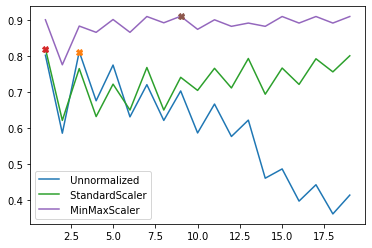

In [108]:
params = {'n_neighbors': range(1, 20)}
scorer = make_scorer(recall_score)

cv = GridSearchCV(model,params,cv=10,scoring=scorer)
cv.fit(X_full_train, y_train)

params = {'knn__n_neighbors': range(1, 20)}
model_std = Pipeline([
    ('norm', StandardScaler()),
    ('knn', KNeighborsClassifier())])
cv_std = GridSearchCV(model_std, params, refit=True, cv=10,
                     scoring=make_scorer(recall_score))
cv_std.fit(X_full_train, y_train)

model_minmax = Pipeline([
    ('norm', MinMaxScaler()),
    ('knn', KNeighborsClassifier())])
cv_minmax = GridSearchCV(model_minmax, params, refit=True, cv=10,
                        scoring=make_scorer(recall_score))
cv_minmax.fit(X_full_train, y_train)

# Plot the cv lines
show_results_rec(cv, X_full_test, "param_n_neighbors", prefix="Unnormalized")
show_results_rec(cv_std, X_full_test, 'param_knn__n_neighbors', "StandardScaler")
show_results_rec(cv_minmax, X_full_test, 'param_knn__n_neighbors', "MinMaxScaler")

Train accuracy: 0.9620853080568721
Train recall: 0.9459459459459459


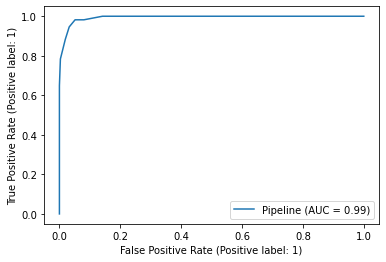

In [109]:
Model_best = cv_minmax.best_estimator_

print("Train accuracy:", accuracy_score(y_train, Model_best.predict(X_full_train)))
print("Train recall:", recall_score(y_train, Model_best.predict(X_full_train)))
_ = RocCurveDisplay.from_estimator(Model_best, X_full_train, y_train)

Test accuracy: 0.9290780141843972
Test recall: 0.8717948717948718


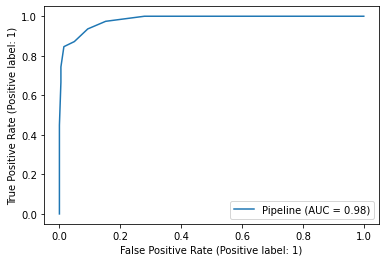

In [110]:
print("Test accuracy:", accuracy_score(y_test, Model_best.predict(X_full_test)))
print("Test recall:", recall_score(y_test, Model_best.predict(X_full_test)))
_ = RocCurveDisplay.from_estimator(Model_best, X_full_test, y_test)

Sensitivity  0.8717948717948718
Specificity  0.9509803921568627
Precision  0.8717948717948718
F1-score 0.8717948717948718 

              precision    recall  f1-score   support

     NOT ASD       0.95      0.95      0.95       204
         ASD       0.87      0.87      0.87        78

    accuracy                           0.93       282
   macro avg       0.91      0.91      0.91       282
weighted avg       0.93      0.93      0.93       282



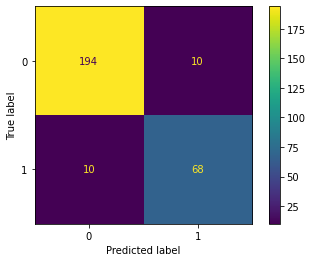

In [111]:
cm = confusion_matrix(y_test, Model_best.predict(X_full_test))
# Plot test confution matrix
_ = ConfusionMatrixDisplay.from_estimator(Model_best, X_full_test, y_test)

print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm), "\n")

print(classification_report(y_test, Model_best.predict(X_full_test), target_names=['NOT ASD', 'ASD']))

MinMaxScaler performs best in our case, both considering accuracy and recall metrics. Interestingly, a similar $K$ is found ($8$ and $9$ respectively).

# Support Vector Machine

Support vector machine is a classification method that finds an hyperplane that divides the data in the features' space by maximizing the margin between the decision boundary and the samples, possibly taking into account also misclassified points. The cost to penalize points that are misclassified, $C$, needs to be optimized for the specific dataset.

SVM can use different <b>kernel functions</b> to find the best hyperplane in another space and then project it in the feature space, obtaining a non linear boundary.

## Grid Search for the best Kernel

We'll take into account:

- <b>Linear</b>

- <b>RBF</b> (Radial Basis Function) Kernel:  $K\left(\mathbf{x}, \mathbf{x}^{\prime}\right)=\exp \left(-\gamma\left\|\boldsymbol{x}-\boldsymbol{x}^{\prime}\right\|^{2}\right)\quad$ where $\gamma$ is specified by parameter `gamma`, must be greater than 0

- <b>Polynomial</b> Kernel: $K\left(\mathbf{x}, \mathbf{x}^{\prime}\right)=\left(\gamma\left\langle x, x^{\prime}\right\rangle+r\right)^{d}\quad$ where $d$ is specified by parameter `degree`, $r$ by `coef0`

- <b>Sigmoid</b> Kernel: $K\left(\mathbf{x}, \mathbf{x}^{\prime}\right) = \tanh \left(\gamma\left\langle x, x^{\prime}\right\rangle+r\right)\quad$ where $r$ is specified by `coef0`, $\gamma$ is specified by parameter `gamma`

First we take into account accuracy.

In [112]:
# Linear
param_grid = {'C':np.linspace(0.001, 100, 5)}
svm_model = SVC(kernel='linear')
svm_linear = GridSearchCV(SVC(kernel='linear'), param_grid,
                         cv=5, scoring='accuracy', refit=True)
svm_linear.fit(X_full_train, y_train)

# Polynomial
param_grid = {'C': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5),
              'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly'), param_grid,
                        cv=5, scoring='accuracy', refit=True)
svm_poly.fit(X_full_train, y_train)

# RBF
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5)}
rbf_poly = GridSearchCV(SVC(kernel='rbf'), param_grid, 
                        cv=5, scoring='accuracy', refit=True)
rbf_poly.fit(X_full_train, y_train)

# Sigmoid
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid'), param_grid, 
                         cv=5, scoring='accuracy', refit=True)
sigm_poly.fit(X_full_train, y_train)

for m in [svm_linear, svm_poly, rbf_poly, sigm_poly]:
    cv_score = m.best_score_
    m = m.best_estimator_
    print(m)
    print("cv score: {}\n".format(cv_score))

SVC(C=25.00075, kernel='linear')
cv score: 0.9928571428571429

SVC(C=25.00075, coef0=10.0, kernel='poly')
cv score: 0.9904761904761905

SVC(C=100.0, gamma=0.001)
cv score: 0.9786834733893558

SVC(C=0.001, coef0=-10.0, gamma=0.001, kernel='sigmoid')
cv score: 0.7369747899159664



SVC(C=25.00075, kernel='linear')
train accuracy: 1.0
train recall: 1.0

SVC(C=25.00075, coef0=10.0, kernel='poly')
train accuracy: 1.0
train recall: 1.0

SVC(C=100.0, gamma=0.001)
train accuracy: 0.9928909952606635
train recall: 0.9819819819819819

SVC(C=0.001, coef0=-10.0, gamma=0.001, kernel='sigmoid')
train accuracy: 0.7369668246445498
train recall: 0.0



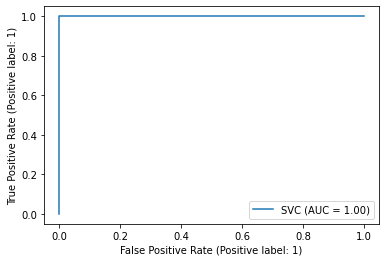

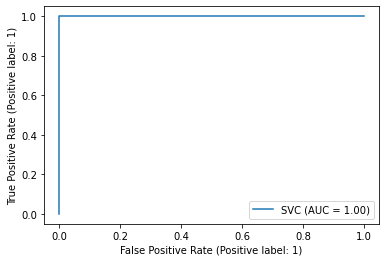

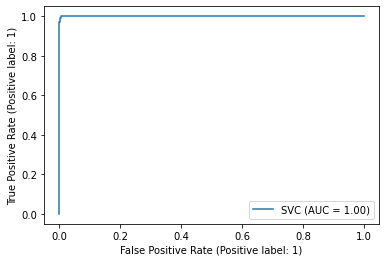

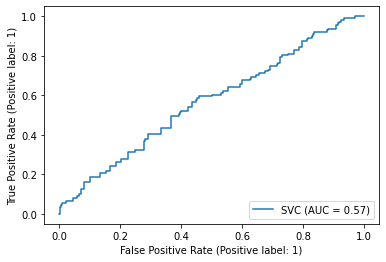

In [113]:
for m in [svm_linear, svm_poly, rbf_poly, sigm_poly]:
    cv_score = m.best_score_
    m = m.best_estimator_
    print(m)
    print("train accuracy: {}".format(accuracy_score(y_train, m.predict(X_full_train))))
    print("train recall: {}\n".format(recall_score(y_train, m.predict(X_full_train))))
    _ = RocCurveDisplay.from_estimator(m, X_full_train, y_train)

SVC(C=25.00075, kernel='linear')
test accuracy: 1.0
test recall: 1.0

SVC(C=25.00075, coef0=10.0, kernel='poly')
test accuracy: 1.0
test recall: 1.0

SVC(C=100.0, gamma=0.001)
test accuracy: 0.9645390070921985
test recall: 0.9102564102564102

SVC(C=0.001, coef0=-10.0, gamma=0.001, kernel='sigmoid')
test accuracy: 0.723404255319149
test recall: 0.0



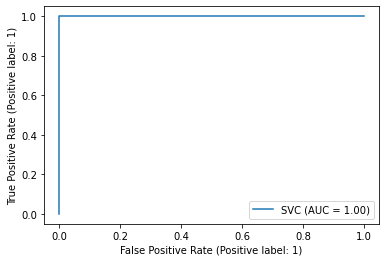

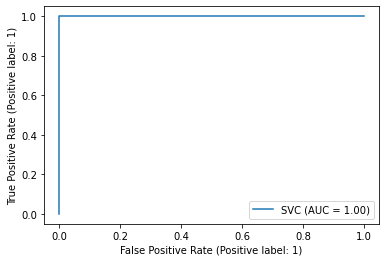

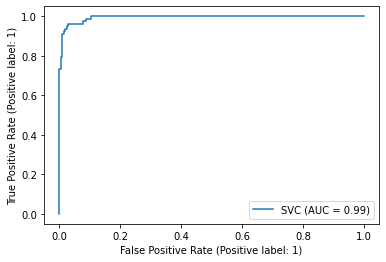

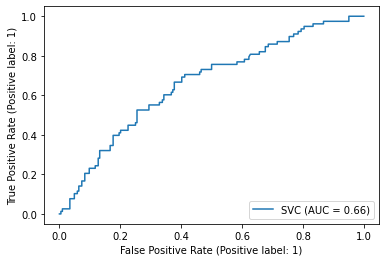

In [114]:
for m in [svm_linear, svm_poly, rbf_poly, sigm_poly]:
    cv_score = m.best_score_
    m = m.best_estimator_
    print(m)
    test_acc = accuracy_score(y_test, m.predict(X_full_test))
    print("test accuracy: {}".format(accuracy_score(y_test, m.predict(X_full_test))))
    print("test recall: {}\n".format(recall_score(y_test, m.predict(X_full_test))))
    _ = RocCurveDisplay.from_estimator(m, X_full_test, y_test)

All kernels except sigmoid (train and test recall $= 0$!) have a CV score close to $1$ with linear (<i>SVC(C=25.00075, kernel='linear')</i> performing best on CV. Let's now see what happens considering recall as metric.

In [115]:
#Linear
param_grid = {'C':np.linspace(0.001, 100, 5)}
svm_model = SVC(kernel='linear')
svm_linear = GridSearchCV(SVC(kernel='linear'), param_grid,
                         cv=5, scoring='recall', refit=True)
svm_linear.fit(X_full_train, y_train)

# Polynomial
param_grid = {'C': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5),
              'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly'), param_grid,
                        cv=5, scoring='recall', refit=True)
svm_poly.fit(X_full_train, y_train)

# RBF
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5)}
rbf_poly = GridSearchCV(SVC(kernel='rbf'), param_grid, 
                        cv=5, scoring='recall', refit=True)
rbf_poly.fit(X_full_train, y_train)

# Sigmoid
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid'), param_grid, 
                         cv=5, scoring='recall', refit=True)
sigm_poly.fit(X_full_train, y_train)

for m in [svm_linear, svm_poly, rbf_poly, sigm_poly]:
    cv_score = m.best_score_
    m = m.best_estimator_
    print(m)
    print("cv score: {}\n".format(cv_score))

SVC(C=25.00075, kernel='linear')
cv score: 0.990909090909091

SVC(C=25.00075, coef0=10.0, kernel='poly')
cv score: 0.9818181818181818

SVC(C=75.00025, gamma=0.001)
cv score: 0.9549407114624507

SVC(C=50.000499999999995, gamma=0.001, kernel='sigmoid')
cv score: 0.2782608695652174



SVC(C=25.00075, kernel='linear')
train accuracy: 1.0
train recall: 1.0

SVC(C=25.00075, coef0=10.0, kernel='poly')
train accuracy: 1.0
train recall: 1.0

SVC(C=75.00025, gamma=0.001)
train accuracy: 0.9928909952606635
train recall: 0.9819819819819819

SVC(C=50.000499999999995, gamma=0.001, kernel='sigmoid')
train accuracy: 0.6327014218009479
train recall: 0.2972972972972973



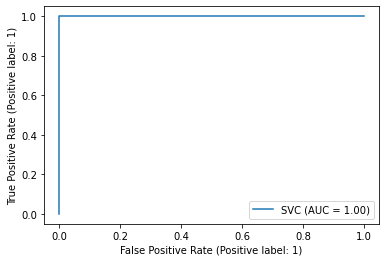

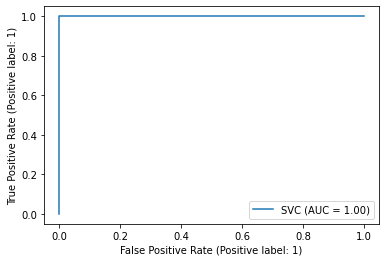

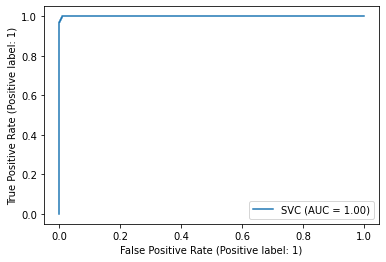

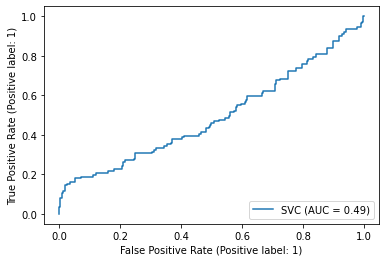

In [116]:
for m in [svm_linear, svm_poly, rbf_poly, sigm_poly]:
    cv_score = m.best_score_
    m = m.best_estimator_
    print(m)
    print("train accuracy: {}".format(accuracy_score(y_train, m.predict(X_full_train))))
    print("train recall: {}\n".format(recall_score(y_train, m.predict(X_full_train))))
    _ = RocCurveDisplay.from_estimator(m, X_full_train, y_train)

SVC(C=25.00075, kernel='linear')
test accuracy: 1.0
test recall: 1.0

SVC(C=25.00075, coef0=10.0, kernel='poly')
test accuracy: 1.0
test recall: 1.0

SVC(C=75.00025, gamma=0.001)
test accuracy: 0.9680851063829787
test recall: 0.9358974358974359

SVC(C=50.000499999999995, gamma=0.001, kernel='sigmoid')
test accuracy: 0.5567375886524822
test recall: 0.28205128205128205



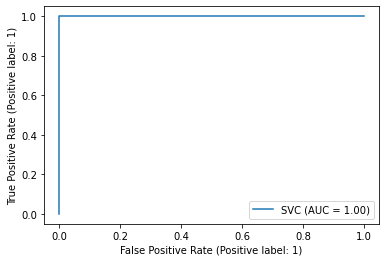

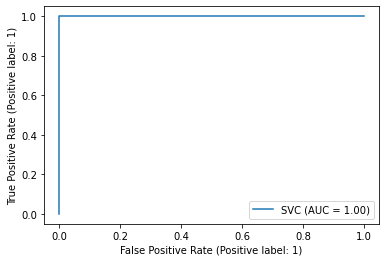

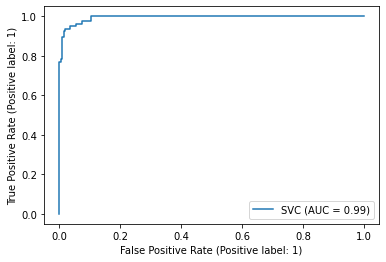

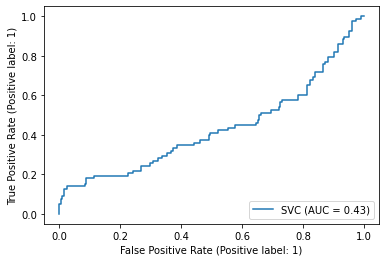

In [117]:
for m in [svm_linear, svm_poly, rbf_poly, sigm_poly]:
    cv_score = m.best_score_
    m = m.best_estimator_
    print(m)
    test_acc = accuracy_score(y_test, m.predict(X_full_test))
    print("test accuracy: {}".format(accuracy_score(y_test, m.predict(X_full_test))))
    print("test recall: {}\n".format(recall_score(y_test, m.predict(X_full_test))))
    _ = RocCurveDisplay.from_estimator(m, X_full_test, y_test)

Reaching similar results.

Sigmoid kernel perform worst than the random classifier (AUC $< 0.5$) both on train and test sets; consequently if we would have had only this kernel at disposal, we'd better choose the opposite classifier.

# Final comparison and considerations
Finally, let's compare all the models seen until now using the full set of features. As done before, we take into account accuracy and then recall metrics.

logistic CV score: 0.9740,  test score 0.9752
lasso CV score: 0.9905,  test score 0.9716
ridge CV score: 0.9763,  test score 0.9574
logistic_poly CV score: 0.9739,  test score 0.9610
perceptron CV score: 0.8862,  test score 0.8972
lda CV score: 0.9478,  test score 0.9184
lda_poly CV score: 0.5810,  test score 0.6383
qda CV score: 0.3717,  test score 0.3121
SVC_linear CV score: 1.0000,  test score 1.0000
KNN (K=5) CV score: 0.9028,  test score 0.8794
KNN_std (K=19) CV score: 0.9218,  test score 0.9184
KNN_minmax (K=8) CV score: 0.9527,  test score 0.9326


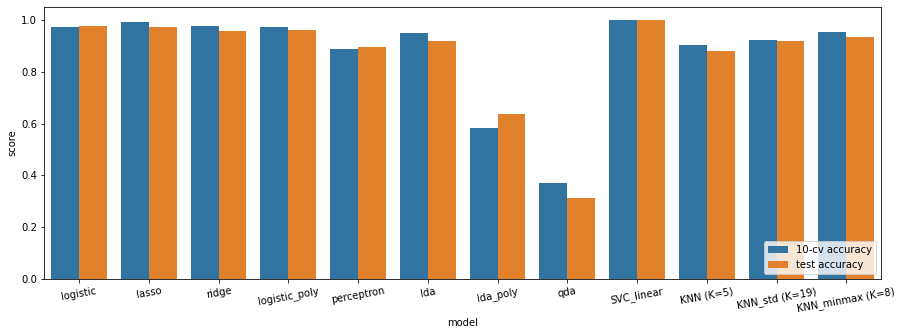

In [118]:
logistic = LogisticRegression(solver='newton-cg', penalty='none') 
lasso = Pipeline([('scaler',preprocessing.StandardScaler()), 
                 ('classifier',LogisticRegression(solver='liblinear', penalty='l1', C=0.39396060606060607))])
ridge_2 = Pipeline([('scaler',preprocessing.StandardScaler()), 
                 ('classifier',LogisticRegression(solver='liblinear', penalty='l2', C=0.2727727272727273))])
pt_model = Perceptron()
lr_poly = Pipeline([('poly', PolynomialFeatures(degree=2)),
                    ('lda', LogisticRegression(solver='newton-cg'))])
lda = LDA(store_covariance=True)
lda_poly = Pipeline([('poly', PolynomialFeatures(degree=2)),
                     ('lda', LDA(store_covariance=True))])
qda = QDA(store_covariance=True)
svc= SVC(C=25.00075, kernel='linear', probability=True)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn_std19 = Pipeline([
    ('norm', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=19))]) 
knn_minmax8 = Pipeline([
    ('norm', MinMaxScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=8))]) 

models = OrderedDict([('logistic', logistic), ('lasso', lasso), ('ridge', ridge_2), ('logistic_poly', lr_poly),
                      ('perceptron', pt_model), ('lda', lda), ('lda_poly', lda_poly), ('qda', qda),
                      ('SVC_linear', svc), ('KNN (K=5)', knn5), ('KNN_std (K=19)', knn_std19),
                      ('KNN_minmax (K=8)', knn_minmax8)])

cv_scores, test_scores = [], []
for name, model in models.items():
    scores = cross_val_score(model,X_full_train,y_train,cv=10,scoring=make_scorer(accuracy_score))
    cv_score = scores.mean()
    cv_scores.append(cv_score)
    
    model.fit(X_full_train, y_train)
    test_score = accuracy_score(y_test, model.predict(X_full_test))
    test_scores.append(test_score)
    print("{} CV score: {:.4f},  test score {:.4f}".format(name, cv_score, test_score))

data = pd.DataFrame()
data['model'] = list(models.keys()) * 2
data['metric'] = ['10-cv accuracy'] * len(cv_scores) + ['test accuracy'] * len(test_scores)
data['score'] = cv_scores + test_scores

plt.figure(figsize=(15,5))
_ = sns.barplot(x='model', y='score', data=data, hue='metric')
_ = plt.legend(loc='lower right')
_ = plt.xticks(rotation = 10) # X axis' rotation = 10°

All models performs very well except, as already seen, polynomial LDA and QDA.

Perfect results in terms of $10$-CV and test accuracy scores are reached by SVC with a linear kernel (<i>SVC_linear CV score: $1.0000$, test score $1.0000$</i>).

Let's now consider recall.

logistic CV score: 0.9727,  test score 0.9487
lasso CV score: 0.9818,  test score 0.9487
ridge CV score: 1.0000,  test score 0.9872
logistic_poly CV score: 0.9455,  test score 0.8974
perceptron CV score: 0.6955,  test score 0.9487
lda CV score: 0.9545,  test score 0.8974
lda_poly CV score: 0.5576,  test score 0.5897
qda CV score: 0.9727,  test score 0.9487
SVC_linear CV score: 1.0000,  test score 1.0000
KNN (K=3) CV score: 0.8121,  test score 0.8333
KNN_std (K=1) CV score: 0.8205,  test score 0.7821
KNN_minmax (K=9) CV score: 0.9106,  test score 0.8718


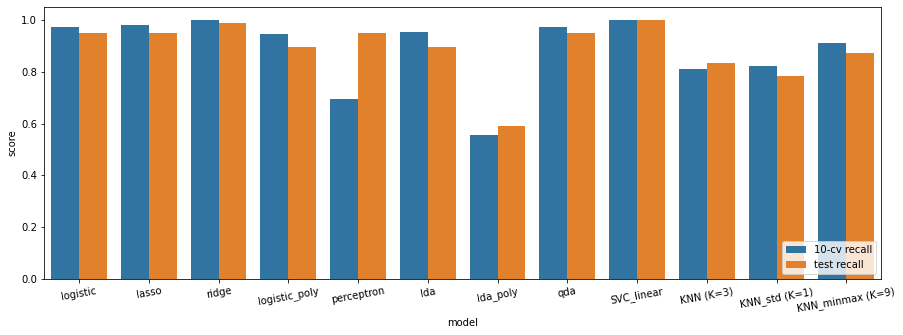

In [119]:
ridge_1 = Pipeline([('scaler',preprocessing.StandardScaler()), 
                 ('classifier',LogisticRegression(solver='liblinear', penalty='l2', C=0.0001))])
knn3 = KNeighborsClassifier(n_neighbors=3)
knn_std1 = Pipeline([
    ('norm', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=1))]) 
knn_minmax9 = Pipeline([
    ('norm', MinMaxScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=9))]) 

models = OrderedDict([('logistic', logistic), ('lasso', lasso), ('ridge', ridge_1), ('logistic_poly', lr_poly),
                      ('perceptron', pt_model), ('lda', lda), ('lda_poly', lda_poly), ('qda', qda),
                      ('SVC_linear', svc), ('KNN (K=3)', knn3), ('KNN_std (K=1)', knn_std1),
                      ('KNN_minmax (K=9)', knn_minmax9)])

cv_scores, test_scores = [], []
for name, model in models.items():
    scores = cross_val_score(model,X_full_train,y_train,cv=10,scoring=make_scorer(recall_score))
    cv_score = scores.mean()
    cv_scores.append(cv_score)
    
    model.fit(X_full_train, y_train)
    test_score = recall_score(y_test, model.predict(X_full_test))
    test_scores.append(test_score)
    print("{} CV score: {:.4f},  test score {:.4f}".format(name, cv_score, test_score))

data = pd.DataFrame()
data['model'] = list(models.keys()) * 2
data['metric'] = ['10-cv recall'] * len(cv_scores) + ['test recall'] * len(test_scores)
data['score'] = cv_scores + test_scores

plt.figure(figsize=(15,5))
_ = sns.barplot(x='model', y='score', data=data, hue='metric')
_ = plt.legend(loc='lower right')
_ = plt.xticks(rotation = 10) # X axis' rotation = 10°

Again it is important to notice that polynomial LDA performs bad on this dataset.

Even though we did not give too much attention to it, <b>Perceptron</b> performs decently on this dataset if we are interested in recall metric (Perceptron CV score: $0.6955$, test score $0.9487$). Basically a Perceptron is a linear classifier for which we do not assume any particular probabilistic model generating the data (we learn the parameters using some optimization technique so to minimize an error function, e.g., the error rate).

Perfect performance is again reached by SVC with a linear kernel, followed by Ridge Regression (CV score: $1.0000$, test score $0.9872$) and Lasso (CV score: $0.9818$, test score $0.9487$).

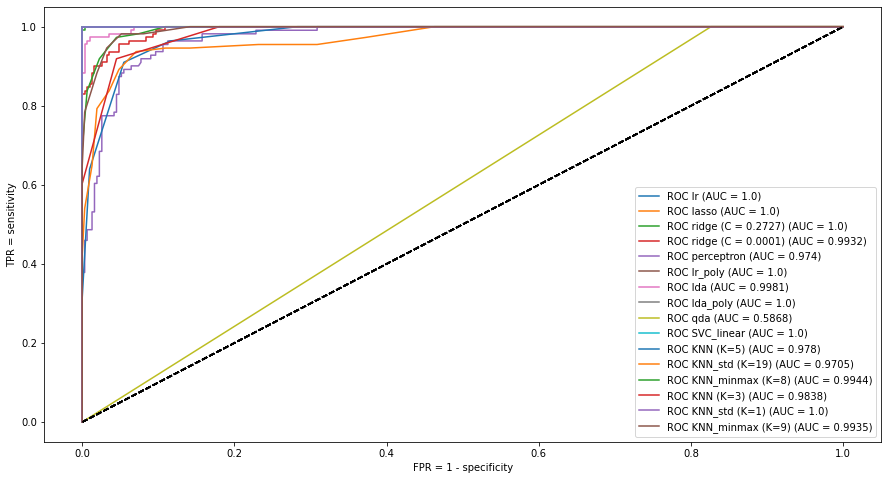

In [120]:
def plot_roc(predict_fn, X, y, label=None):
    fprs, tprs, _ = roc_curve(y, predict_fn(X)[:,-1])
    auc = roc_auc_score(y, predict_fn(X)[:,-1])
    plt.plot(fprs, tprs, label="ROC "+label+" (AUC = "+(np.round(auc,4)).astype('str')+')')
    x_r = y_r = [0,1]
    plt.plot(x_r, x_r, color = 'black', linestyle='--')
    plt.xlabel("FPR = 1 - specificity")
    plt.ylabel("TPR = sensitivity")
    plt.legend()

clf_isotonic = CalibratedClassifierCV(pt_model, cv=10, method='isotonic')

plt.figure(figsize=(15,8))
for name, model in [('lr', logistic), 
                    ('lasso', lasso),
                    ('ridge (C = 0.2727)', ridge_2),
                    ('ridge (C = 0.0001)', ridge_1),
                    ('perceptron', clf_isotonic),
                    ('lr_poly', lr_poly), 
                    ('lda', lda),
                    ('lda_poly', lda_poly), 
                    ('qda', qda),
                    ('SVC_linear', svc),
                    ('KNN (K=5)', knn5),
                    ('KNN_std (K=19)', knn_std19),
                    ('KNN_minmax (K=8)', knn_minmax8),
                    ('KNN (K=3)', knn3),
                    ('KNN_std (K=1)', knn_std1),
                    ('KNN_minmax (K=9)', knn_minmax9)]:
    model.fit(X_full_train, y_train)
    plot_roc(model.predict_proba, X_full_train, y_train, name)

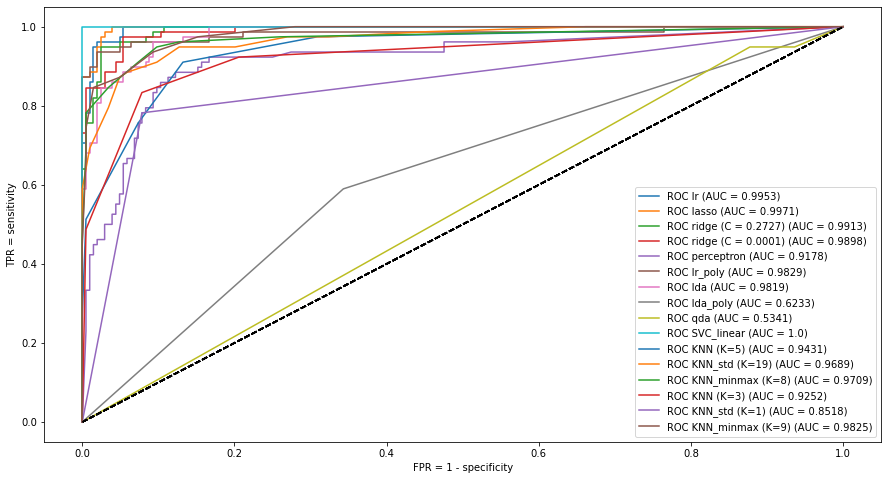

In [121]:
plt.figure(figsize=(15,8))
for name, model in [('lr', logistic), 
                    ('lasso', lasso),
                    ('ridge (C = 0.2727)', ridge_2),
                    ('ridge (C = 0.0001)', ridge_1),
                    ('perceptron', clf_isotonic),
                    ('lr_poly', lr_poly), 
                    ('lda', lda),
                    ('lda_poly', lda_poly), 
                    ('qda', qda),
                    ('SVC_linear', svc),
                    ('KNN (K=5)', knn5),
                    ('KNN_std (K=19)', knn_std19),
                    ('KNN_minmax (K=8)', knn_minmax8),
                    ('KNN (K=3)', knn3),
                    ('KNN_std (K=1)', knn_std1),
                    ('KNN_minmax (K=9)', knn_minmax9)]:
    plot_roc(model.predict_proba, X_full_test, y_test, name)

From ROC curves and AUCs we notice SVC with a linear kernel performs best (we can even say perfectly because train and test AUCs $= 1$).

QDA is comparable to the random classifier (dashed black line) both on train and test sets (AUC $\approx 0.5$).

Polynomial LDA ends up in an <b>overfitting</b> issue (highest train AUC, lowest test AUC).

Cross-validated Lasso with $C = 0.3939$, Ridge Regression with $C = 0.2727$ and MinMax KNN with $K = 9$ perform well too with test AUC of, respectively, $0.9971$, $0.9913$ and $0.9825$.